# 실습 2차시 (Decision Tree)

2020년 09월 28일

실습 조교: 김우진 (koreaaiassistant@gmail.com)

실습 파일 제출 기한: 2020년 10월 7일 15시 29분


# 사용 데이터

이번 실습에서는 car dataset으로 결정트리(decision tree)를 만들어보겠습니다. 

Car 데이터의 label은 4개의 class가 있습니다. 이 class는 차량 구매시 만족도(acceptability)를 나타냅니다. 클래스에는 `unacc`(unacceptable), `acc`(acceptable), `good`, `vgood`이 있습니다.

각 차량은 6개의 feature을 가지고 있습니다. 
+ buying (차량의 가격): `"vhigh"`,`"high"`,`"med"`, or `"low"`.
+ maint (차량 유지 비용): `"vhigh"`,`"high"`,`"med"`, or `"low"`.
+ doors (차의 문 갯수): `"2"`,`"3"`,`"4"`,`"5more"`.
+ persons (차량의 최대 탑승 인원): `"2"`,`"4"`, or `"more"`.
+ lug_boot (차량 트렁크의 사이즈): `"small"`,`"med"`, or `"big"`
+ safety (차량의 안전성 등급): `"low"`,`"med"`, or `"high"`.

[car data](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

In [2]:
import pandas as pd

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

car_data = pd.read_csv(url, header=None)
car_data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "accept"]

In [4]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,accept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 지니 불순도 (Gini Impurity)

아래 두개의 트리를 살펴보겠습니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/comparison_1.svg width=300px><img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/comparison_2.svg width=300px>

둘 중 어느 트리가 학생이 A를 받을 수 있을지 예측하는데에 더 유용할까요?


(말로 합니다.) 예를 들어 왼쪽 트리를 사용한다고 가정합니다. 그렇다면, 왼쪽 트리의 양쪽 노드의 레이블이 확실치 않은 것을 확인할 수 있습니다. 왜냐면 두 클래스가 섞여 있기 때문입니다. 대신에 오른쪽 트리를 사용한다고 가정해봅니다. 이 경우에는 양쪽 끝노드에는 하나의 클래스밖에 없기 때문에 결정이 확실하게 됩니다. 따라서 오른쪽 트리를 사용할 경우에는 우리의 예측에 대해 확실함을 가질 수 있습니다.

위 질문은 한 세트의 instance 들에 대해 지니 불순도를 계산함으로써 답할 수 있습니다. 지니 불순도를 찾기 위해서는 `1`에서 시작해서 세트의 각 class 비율의 제곱을 빼면 됩니다. 예를 들어, `A` class인 instance가 3개 있고 `B` class인 instance가 1개 있는 데이터의 경우에는 지니 불순도는 아래와 같이 계산됩니다. 

$$1 - (3/4)^2 - (1/4)^2 = 0.375$$

만약 데이터가 하나의 class만 있다면, 지니 불순도는 `0`이 됩니다. 불순도가 낮으면 낮을수록 결정트리의 성능은 더 좋아집니다.

## 활동 1

In [5]:
# TODO_01: 왼쪽 결정트리의 왼쪽 끝마디의 지니 불순도 계산하기
1 - (4/6)**2 - (2/6)**2

0.4444444444444445

In [6]:
sample_labels = ["unacc", "unacc", "acc", "acc", "good", "good"]

1. 위 `sample_labels` 리스트의 지니 불순도를 계산해보겠습니다. 
    
    먼저 `impurity`라는 변수를 선언하고 `1`을 저장합니다.

In [7]:
impurity = 1

2. 이제 데이터 label에 class가 몇 개인지 세보겠습니다.

    파이썬의 `Counter` 오브젝트는 이를 간편하게 할 수 있습니다.

    예를 들어, 아래와 같은 코드에서,
    ```py
    list = ["A", "A", "B"]
    counts = Counter(list)
    ```

    `counts` 변수는 아래 Counter object을 저장하고 있게 됩니다.
    ```py
    Counter({"A": 2, "B": 1})
    ```

In [9]:
# TODO
# 1. `sample_labels`의 Counter object을 생성하고 `label_counts`라고 선언합니다. 
# 2. `labels_counts`를 프린트합니다.
from collections import Counter

label_counts = Counter(sample_labels)
print(label_counts)

Counter({'unacc': 2, 'acc': 2, 'good': 2})


3. 데이터셋에서 각 `label`의 확률을 계산해보겠습니다. 그리고 그 확률을 이용하여 `sample_labels`의 불순도를 계산해봅니다.

In [13]:
# TODO
for label in label_counts:
  probability_of_label=label_counts[label]/len(sample_labels)
  impurity -= probability_of_label ** 2
print(impurity)

0.6666666666666665


4. 지니 불순도를 계산하는 위 코드를 함수로 만듭니다.

In [17]:
# TODO
def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    probability_of_label=label_counts[label]/len(dataset)
    impurity -= probability_of_label ** 2
  return impurity

## 미니과제

주어진 `sample_labels_1`와 `sample_labels_2`의 주석(`#`)을 제거하여 각각 지니 불순도를 계산하고 `gini()`함수를 통해 계산하고 프린트해봅니다.

In [24]:
sample_labels_1 = ["unacc","unacc","unacc", "good", "vgood", "vgood"]
sample_labels_2 = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc"]

impurity_1 = gini(sample_labels_1)
impurity_2 = gini(sample_labels_2)

print(impurity_1)
print(impurity_2)

0.6111111111111112
0.0


# 정보증가량 (Information Gain)

이제 지니 불순도가 낮은 끝마디(leaf node)를 만들기 위해서 어떠한 feature에 따라 데이터를 나누어야하는지 결정해야 합니다. 예를 들어, 학생들의 수면 시간 또는 학생들의 공부 시간 둘 중 어느 feature을 기준으로 학생들을 나누어야 더 좋은 tree를 만들 수 있을까요?

위 질문에 답하기 위해 어떠한 feature에 대하여 데이터를 나누었을 때의 정보증가량을 계산해야 합니다. 정보증가량은 데이터를 나누기 전과 후의 불순도 차이를 측정합니다. 예를 들어, 불순도가 `0.5`인 데이터를 어떠한 feature에 대해 나누었을 때, 불순도가 각각 `0`, `0.375`, `0` 인 끝마디가 생긴다고 가정해봅니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/info.svg width=300px>

 이 경우에 데이터를 나누는 정보증가량은 `0.5 - 0 - 0.375 - 0 = 0.125` 입니다.
 

정보증가량은 크면 클수록 좋습니다. 만약 정보증가량이 `0`이라면 그 feature에 대해 데이터를 나누는 것은 소용이 없습니다. 때에 따라서 데이터를 나누었을 때 정보증가량이 음수가 될 수 있습니다. 이 문제를 해결하기 위해서 가중 정보증가량 (weighted information gain)을 사용합니다.

## 활동 2

1. `unsplit_labels`라는 임의의 label들을 담은 리스트가 하나 주어졌습니다. `unsplit_labels`을 두가지 다른 분할 지점으로 나누었습니다. 이는 `split_labels_1`와 `split_labels_2` 입니다. 각 분할에 대해 information gain을 계산해봅니다.

In [26]:
unsplit_labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", 
                  "good", "good", "good", "vgood", "vgood", "vgood"]

split_labels_1 = [["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "vgood"], 
                  [ "good", "good"], 
                  ["vgood", "vgood"]]

split_labels_2 = [["unacc", "unacc", "unacc", "unacc","unacc", "unacc", "good", "good", "good", "good"], 
                  ["vgood", "vgood", "vgood"]]

In [35]:
# TODO: `info_gain_1` 변수를 선언하고 `unsplit_labels`의 지니 불순도를 gini() 함수를 사용하여 계산하여 저장하세요.
info_gain_1 = gini(unsplit_labels)
info_gain_1

0.6390532544378698

2. `split_labels_1`의 각 부분집합에 대하여 지니 불순도를 계산해봅니다. 그리고 이 분할의 정보 증가량도 계산해봅니다.

In [36]:
# TODO: split_labels_1의 모든 subset에 대하여 지니 불순도를 계산하여 info_gain_1을 계산합니다. 그리고 info_gain_1을 프린트 해봅니다.
for subset in split_labels_1:
  info_gain_1 -= gini(subset)
info_gain_1

0.14522609394404257

3. `split_labels_2`에 대해서도 동일한 방법으로 정보증가량을 계산해봅니다. `info_gain_2`의 새로운 변수를 선언하여 사용하세요.

In [37]:
# TODO:
info_gain_2 = gini(unsplit_labels)
for subset in split_labels_2:
  info_gain_2 -= gini(subset)

print(info_gain_2)

# TODO: 어느 분할의 정보증가량이 더 큰가요?
# 답변: split 2의 정보증가량이 더 크기 때문에 더 좋다고 할 수 있습니다.

0.15905325443786977


4. 위의 코드를 함수로 만들겠습니다. 함수의 이름은 `information_gain`이며 `staring_labels`와 `split_labels`를 파라미터로 받습니다.

In [38]:
# TODO:
def information_gain(starting_labels, split_labes):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset)
  return info_gain

# 가중 정보증가량 (Weighted Information Gain)

분할 후에 생성되는 데이터의 부분집합의 크기 또한 중요합니다. 예를 들어서, 아래 이미지에서는 불순도가 같은 두 부분집합이 있습니다. 어느 부분집합을 결정 트리의 끝마디로 정하는게 좋은 결정트리를 만들 수 있을까요?

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/impurity-0.svg width=300px>

이 두 부분집합은 모두 불순도가 0으로써 완전하지만, 두번째 부분집합이 더욱 의미있습니다. 두번째 부분집합에는 많은 개수의 instance들이 있기 때문에 이 부분집합이 구성된 것이 우연이 아님을 알수 있습니다.

그 반대를 생각해보는 것도 도움이 됩니다. 아래 그림에서 같은 값의 불순도를 가지고 있는 두 부분집합이 있습니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/impurity-5.svg width=300px>

이 두 부분집합의 불순도는 굉장히 높습니다. 그렇지만 어느 부분집합의 불순도가 더 큰 의미를 가질까요? 왼쪽의 부분집합을 분할하는 것보다는 오른쪽 부분집합을 분할하여 불순도가 없는 집합을 만드는 것이 정보증가량이 더 클 것입니다. 따라서, 집합의 instance 개수를 고려하여 정보증가량을 계산해야 합니다.

집합의 크기까지 고려하도록 정보증가량 함수를 수정하겠습니다. 단순히 불순도를 빼는 것에서 더 나아가 분할된 부분집합의 가중 불순도를 뺄 것입니다. 만약 분할 전의 데이터가 `20`개의 instance을 가지고 있고 하나의 부분집합이 `2`개의 아이템이 있다면, 그 부분집합의 가중 불순도는 `2/20 * impurity`가 됩니다. 이렇게 instance 숫자가 적은 세트의 중요도를 낮춥니다.

가중 정보증가량 계산의 예시는 아래와 같습니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/weighted_info.svg>

## 활동 3

In [39]:
# 샘플 데이터
cars = [['med', 'low', '3', '4', 'med', 'med'], 
        ['med', 'vhigh', '4', 'more', 'small', 'high'], 
        ['high', 'med', '3', '2', 'med', 'low'], 
        ['med', 'low', '4', '4', 'med', 'low'], 
        ['med', 'low', '5more', '2', 'big', 'med'],
        ['med', 'med', '2', 'more', 'big', 'high'],
        ['med', 'med', '2', 'more', 'med', 'med'],
        ['vhigh', 'vhigh', '2', '2', 'med', 'low'], 
        ['high', 'med', '4', '2', 'big', 'low'], 
        ['low', 'low', '2', '4', 'big', 'med']]

car_labels = ['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'good']

1. `information_gain` 함수를 업데이트하여 가중 정보증가량을 계산해보도록 합니다. 새로운 함수의 이름은 `weighted_information_gain` 입니다.

    가중치: 부분집합의 label 갯수 `len(subset)` / 분할 전의 집합의 label 갯수 `len(starting_labels)`

In [41]:
def weighted_information_gain(starting_labels, split_labels):
    info_gain = gini(starting_labels)
    for subset in split_labels:
      # TODO: 지니 불순도에 가중치를 곱하여 정보증가량을 계산합니다.
      info_gain -= gini(subset) * (len(subset)/len(starting_labels))
    return info_gain

2. 아래 `split()` 함수를 살펴보겠습니다.

In [43]:
def split(dataset, labels, column): 
    data_subsets = []
    label_subsets = [] 
    counts = list(set([data[column] for data in dataset]))
    counts.sort() # ['2', '4', 'more']
    for k in counts:
        new_data_subset = [] 
        new_label_subset = []
        for i in range(len(dataset)): # data의 모든 instance에 대해서
            if dataset[i][column] == k: # 만약 그 instance의 column번째 인덱스가 k와 같으면
                new_data_subset.append(dataset[i]) 
                new_label_subset.append(labels[i]) 
        data_subsets.append(new_data_subset) 
        label_subsets.append(new_label_subset) 
    return data_subsets, label_subsets

In [45]:
# cars, car_labels, 3을 받는 split 함수를 호출하고 split_data, split_labels에 저장합니다.
split_data, split_labels = split(cars, car_labels, 3)

3. `split_data`와 `split_labels`이 무엇인지 살펴보겠습니다.

In [48]:
# TODO
# `split_data`를 프린트해봅니다.
print(split_data)
# `split_data`의 길이를 프린트해봅니다.
print(len(split_data))
# split_data[0] 과 split_data[1]을 프린트 해봅니다. 프린트된 리스트의 인덱스 3의 공통점이 무엇인가요?
print(split_data[0])
print(split_data[1])
print(split_data[2])
# 정답: 프린트된 리스트의 인덱스 3의 값들을 보면 각각에 대해서 다 같음을 볼 수 있다. 
# 즉, split 함수를 통해 최대 탑승인원 feature에 대해서 데이터를 split 한 것이다.

[[['high', 'med', '3', '2', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low']], [['med', 'low', '3', '4', 'med', 'med'], ['med', 'low', '4', '4', 'med', 'low'], ['low', 'low', '2', '4', 'big', 'med']], [['med', 'vhigh', '4', 'more', 'small', 'high'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med']]]
3
[['high', 'med', '3', '2', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low']]
[['med', 'low', '3', '4', 'med', 'med'], ['med', 'low', '4', '4', 'med', 'low'], ['low', 'low', '2', '4', 'big', 'med']]
[['med', 'vhigh', '4', 'more', 'small', 'high'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med']]


4. `split_labels`를 사용하여 인덱스 `3`에 대해 스플릿한 information gain을 찾아봅시다.

In [50]:
# 인덱스 3으로 데이터를 분할하였을 때 정보증가량을 프린트해봅니다.
print(weighted_information_gain(car_labels, split_labels))

0.30666666666666675


5. 위의 정보증가량을 찾는 과정을 모든 feature에 대해서 해봅니다.

    

In [52]:
# 데이터에 있는 모든 feature들에 대하여 `split()` 함수와 `information_gain()` 함수를 호출하여 어떠한 feature이 가장 많은 information gain을 만들어 내는지 알아봅니다.
for i in range(0, 6):
  split_data, split_labels = split(cars, car_labels, i)
  print(weighted_information_gain(car_labels,split_labels))

# 몇번째 feature이 가장 높은 정보증가량을 보이나요?
# 정답: 4번째 feature가 가장 정보증가량이 높습니다.

0.2733333333333334
0.04000000000000001
0.10666666666666663
0.30666666666666675
0.15000000000000002
0.29000000000000004


# 활동 4: 재귀 트리 만들기 (Recursive Tree Building)

이제 우리는 데이터를 분할하였을 때 정보증가량이 가장 높은 feature을 찾았습니다. 이 방법을 반복하는 재귀 알고리즘을 통하여 트리 전체를 구성할 수 있습니다. 트레이닝 데이터의 모든 instance에서 시작하여 데이터를 분할할 가장 좋은 feature을 찾고, 그 feature에 대해서 데이터를 나눈 후에 생성된 부분집합에 대해서 재귀적으로 위의 순서를 되풀이합니다.

정보증가량이 일어나지 않는 feature을 찾을 때까지 재귀를 반복합니다. 다른 말로, 우리는 더이상 불순도가 없는 부분집합을 만드는 분할이 존재하지 않을 때 결정 트리의 끝마디를 생성합니다. 이 끝마디는 전체 트레인 데이터에서 분류된 instance의 class을 담고 있습니다. 

In [53]:
def find_best_split(dataset, labels):
    best_gain = 0
    best_feature = 0
    for feature in range(len(dataset[0])): 
        data_subsets, label_subsets = split(dataset, labels, feature) 
        # TODO: 분할된 데이터의 정보증가량 계산
        gain = weighted_information_gain(labels, label_subsets)
        # TODO: 만약 현재 feature에 대해 정보증가량이 지금까지 계산된 정보증가량 중 최댓값보다 크면
        if gain > best_gain:
          # TODO: 최대 증가량과 베스트 피처를 재저장
          best_gain, best_feature = gain, feature
    return best_feature, best_gain # 룹이 끝나면 이 두 값들을 리턴함.

1. `find_best_split` 함수를  `cars`와 `car_labels` 변수에 대해 호출합니다.

In [56]:
#TODO: find_best_split 함수를 cars와 car_labels 변수에 대해 호출합니다.
best_feature, best_gain = find_best_split(cars, car_labels)
print(best_feature)
print(best_gain)

# TODO: 어느 feature이 가장 정보증가량이 컸고, 그 정보증가량은 얼마인가요?
# 정답: 3번 index feature, 즉 persons feature의 정보증가량이 가장 컸고, 그 정보증가량은 0.3066이다.

3
0.30666666666666675


2. `data`와 `labels`를 파라미터로 받는 `build_tree()`라는 함수를 선언하겠습니다. 이 함수는 재귀적으로 트리를 구성합니다.

In [59]:
# TODO: build_tree() 함수 만들기
def build_tree(data, labels):
  best_feature, best_gain = find_best_split(data,labels)
  if best_gain == 0:
    return Counter(labels)
  data_subsets, label_subsets = split(data, labels, best_feature)
  branches = []
  for i in range(len(data_subsets)):
    branch = build_tree(data_subsets[i], label_subsets[i])
    branches.append(branch)
  return branches

3. 이제 만들어진 `build_tree()` 함수를 테스트해봅니다.

    `print_tree()`라는 함수가 주어졌습니다. 이 함수는 트리를 시각화해줍니다.

In [61]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""
    question_dict = {0: "Buying Price", 1:"Price of maintenance", 
                     2:"Number of doors", 3:"Person Capacity", 
                     4:"Size of luggage boot", 5:"Estimated Saftey"}
    # Base case: 끝노드에 도달함
    if isinstance(node, Counter):
        print (spacing + str(node))
        return

    print (spacing + "Splitting")

    # 분할 지점에서 각 브랜치에 대해 재귀적으로 print_tree 함수를 호출합니다.
    for i in range(len(node)):
        print (spacing + '--> Branch ' + str(i)+':')
        print_tree(node[i], spacing + "  ")

In [62]:
# TODO: `cars`와 `car_labels`를 파라미터로 받는 `build_tree()`를 호출하고 `tree`라는 변수에 결과값을 저장합니다.
tree = build_tree(cars, car_labels)
# TODO: `tree`를 파라미터로 `print_tree()`를 호출해봅니다.
print_tree(tree)

Splitting
--> Branch 0:
  Counter({'unacc': 4})
--> Branch 1:
  Splitting
  --> Branch 0:
    Counter({'good': 1})
  --> Branch 1:
    Counter({'acc': 1})
  --> Branch 2:
    Counter({'unacc': 1})
--> Branch 2:
  Splitting
  --> Branch 0:
    Counter({'vgood': 1})
  --> Branch 1:
    Counter({'acc': 1})
  --> Branch 2:
    Counter({'acc': 1})


# 활동 5: scikit-learn으로 구현하는 결정트리

이번 활동에서는 scikit-learn 라이브러리를 사용하여 결정트리를 구현해보겠습니다. 먼저, 데이터부터 알아보겠습니다.

Kaggle의 [Titanic](https://www.kaggle.com/c/titanic) 데이터를 사용합니다.

타이타닉 데이터의 feature:
* Pclass: 승객 등급. 1등급=1, 2등급=2, 3등급=3
* Sex: 성별
* Age: 나이
* SibSp: 함께 탑승한 형제 또는 배우자 수
* Parch: 함께 탑승한 부모 또는 자녀 수
* Fare: 여객 운임

Label: Survived 생존=1, 죽음=0

1. 먼저 데이터를 전처리합니다.

In [64]:
data_url = "https://raw.githubusercontent.com/inikoreaackr/2020_Fall_ML/master/titanic.csv"
# TODO:
data = pd.read_csv(data_url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# 아래 일곱개 열을 고릅니다.
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
# TODO: Age feature에 na값이 있습니다. 이러한 행을 삭제합니다.
data = data.dropna()
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [69]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [68]:
# TODO: Sex feature은 object type입니다. 정수형으로 인코딩합니다.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

In [70]:
# TODO: 데이터를 feature X와 label y로 나눕니다.
y = data[['Survived']]
x = data.drop(columns=['Survived']) # 나머지

# TODO: 데이터를 트레인 데이터와 테스트 데이터로 나눕니다.
from sklearn.model_selection import train_test_split # 이 함수는 랜덤하게 데이터를 트레인과 테스트 셋으로 나눕니다.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3) # test_size=.3 은 데이터의 30%를 테스트 셋으로 나눈다는 설정입니다.

2. scikit-learn 패키지로 결정트리를 구현해보겠습니다.

    scikit-learn은 현재 파이썬으로 구현된 가장 유명한 기계 학습 오픈 소스 라이브러리 입니다. 파이썬 머신러닝 라이브러리에서 정석과도 같은 라이브러리입니다. scikit-learn은 다양한 분류기를 지원하며 머신러닝 결과를 검증 하는 기능도 가지고 있습니다. 또한 분류, 회기, 클러스터링, 차원 축소처럼 머신러닝에 자주 사용되는 다양한 알고리즘을 지원합니다.

    지원되는 다양한 분류기 중, `DecisionTreeClassifier` 분류기를 사용해보겠습니다.

    `sklearn.tree` 모듈에는 `DecisionTreeClassifier` 클래스가 있습니다. `DecisionTreeClassifier` 오브젝트를 생성하려면 생성자(constructor)를 호출합니다:
    ```python
    classifier = DecisionTreeClassifier()
    ```

In [71]:
# TODO: DecisionTreeClassifier을 임포트하고 DecisionTreeClassifier 오브젝트를 생성하세요.
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

3. 트레이팅 데이터에 `.fit()` 메소드를 호출함으로써 트리를 데이터에 훈련시킵니다. `.fit()`메소드는 `training_points`와 `training_labels`을 파라미터로 받습니다.

In [72]:
# TODO: .fit()을 호출하여 트리를 데이터에 훈련시킵니다.
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

4. `testing_points`와 `testing_labels`에 대한 결정 트리의 정확도(`.score()`)를 구해보고 프린트해봅시다. 모델이 얼마나 정확한가요?

In [74]:
# TODO: 정확도를 .score()을 사용하여 프린트합니다.
print(classifier.score(x_test,y_test))

0.7023255813953488


5. 훈련된 트리를 시각화해봅니다.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


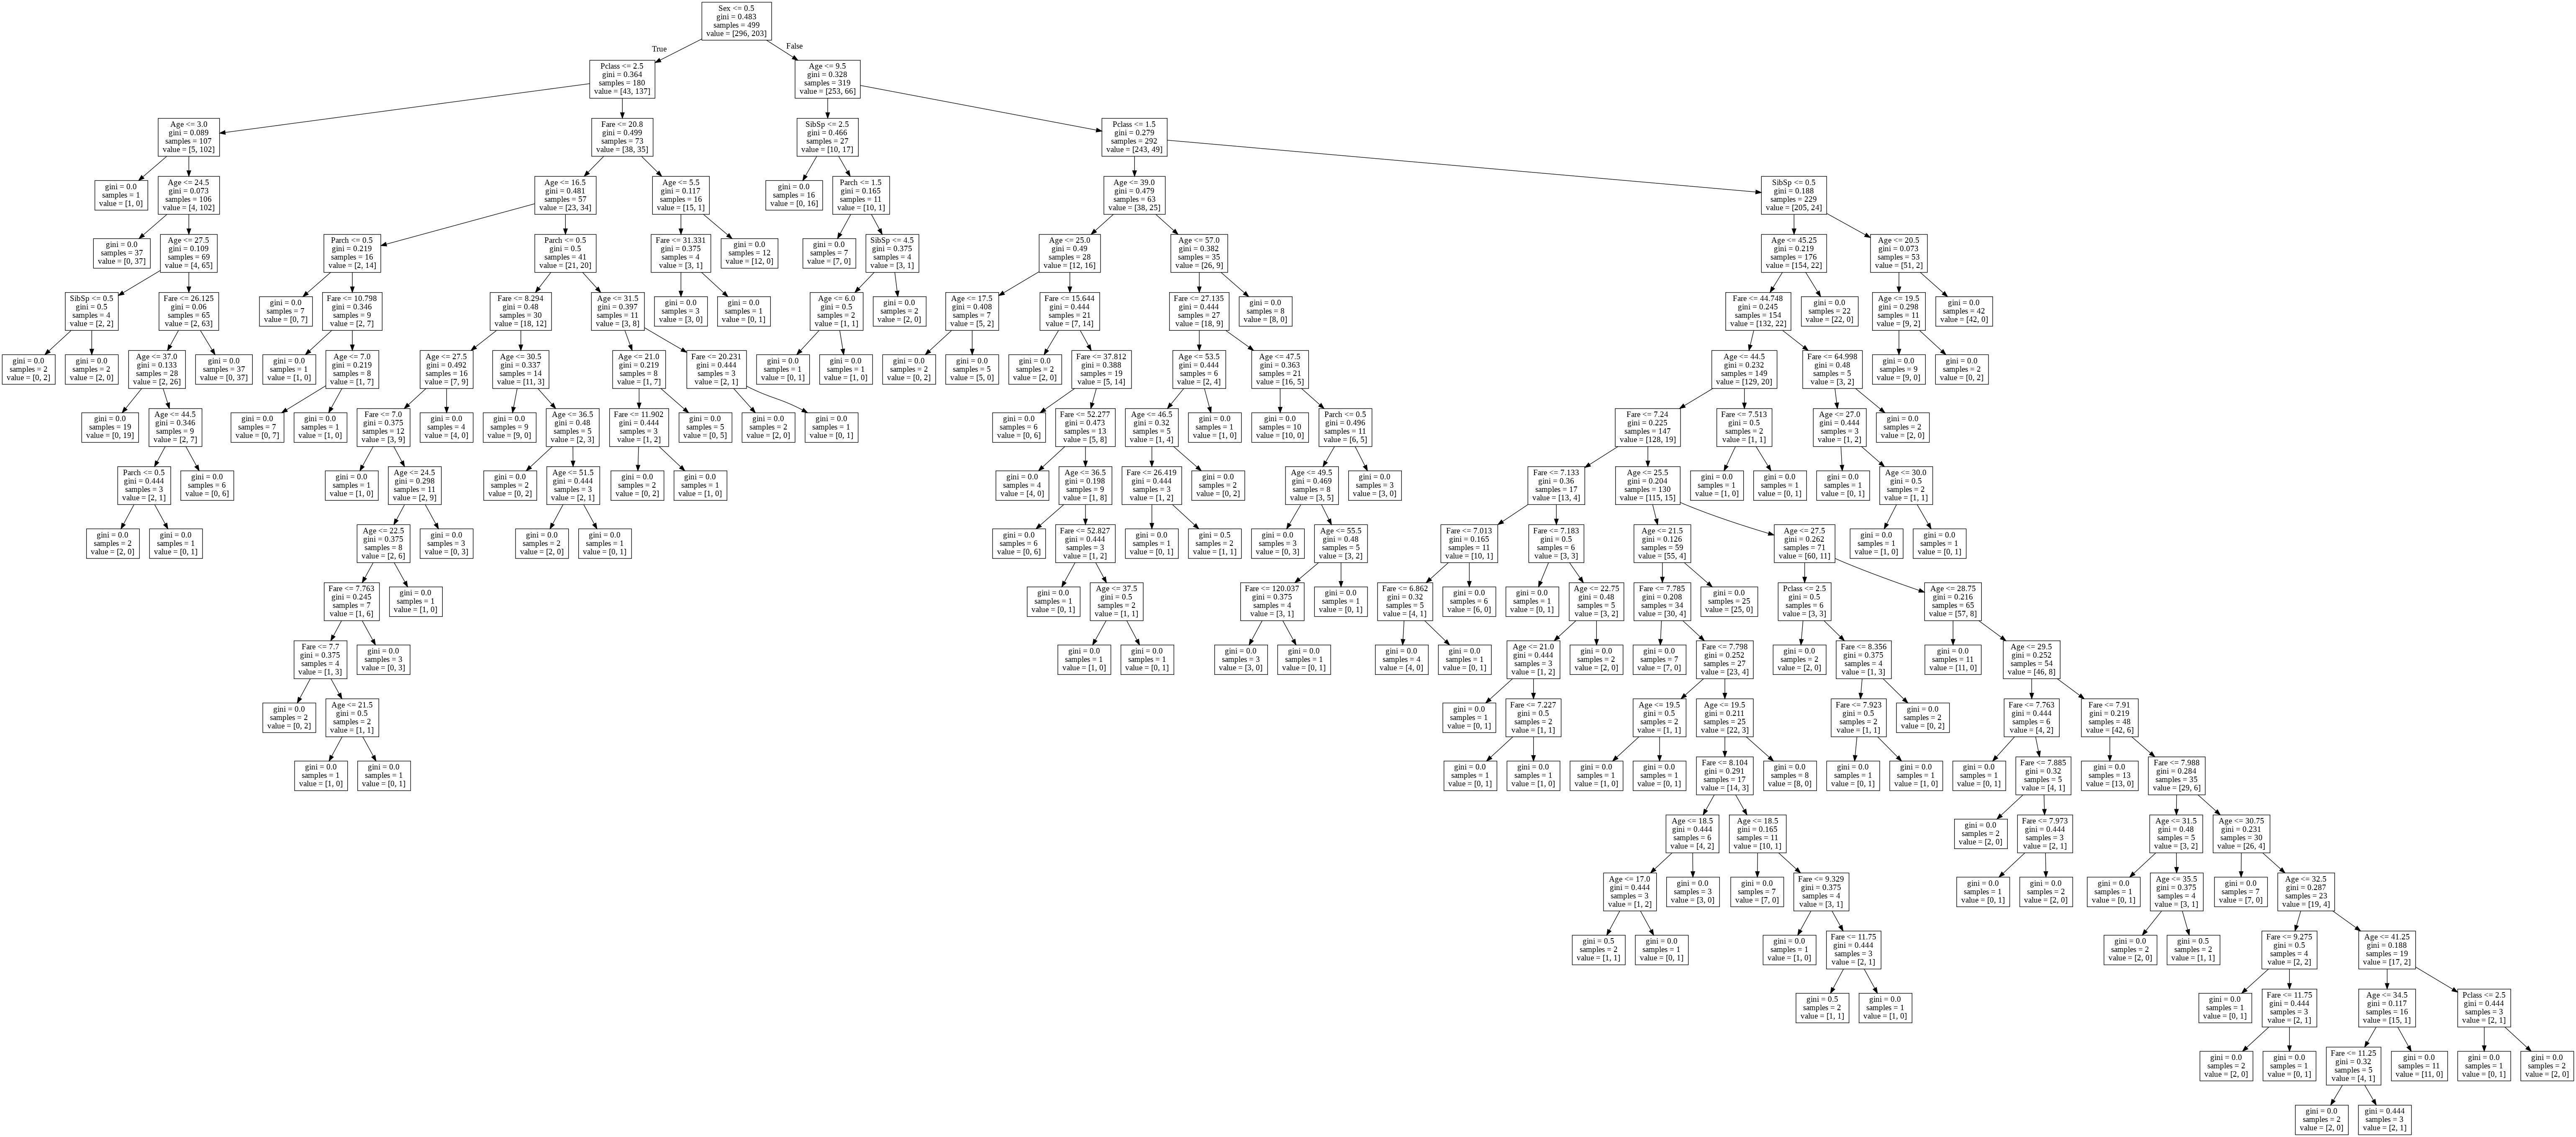

In [75]:
# 아래 코드는 classifier 결정트리를 시각화해줍니다.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

# 활동 7: 결정 트리 가지치기 (pruning)

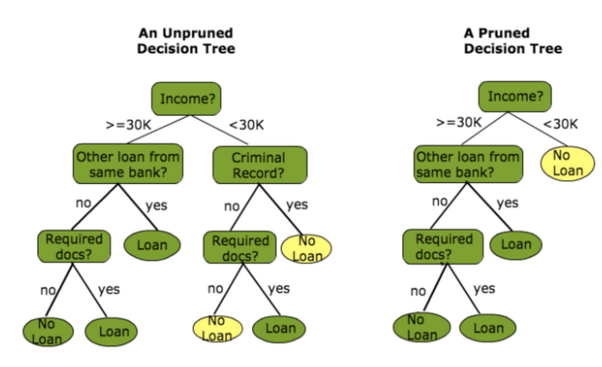

가지치기란 최대트리로 형성된 결정트리의 특정 노드 밑의 하부 트리를 제거하여 일반화 성능을 높히는 것을 의미합니다. 모든 끝노드의 불순도가 0인 트리를 full tree라고 하는데, 이 경우에는 분할이 너무 많이 과적합의 위험이 발생합니다. 과적합은 학습 데이터에 과하게 학습하여 실제 데이터에 오차가 증가하는 현상입니다. 이를 방지하기 위해서 적절한 수준에서 끝노드를 결합해주는 기법을 가지치기(pruning)이라고 합니다. 

이 활동에서는 scikit-learn으로 간단한 수준의 가지치기를 구현해보겠습니다.

In [80]:
# TODO: 새로운 결정트리 오브젝트를 생성합니다. 이번에는 끝노드의 최대 개수를 지정해줍니다. (max_leaf_nodes) 
prune_classifier = DecisionTreeClassifier(max_leaf_nodes=45)

prune_classifier.fit(x_train, y_train)

print(prune_classifier.score(x_test, y_test))

0.7627906976744186


이렇게 끝노드의 개수를 지정해주면 트리가 데이터에 더욱 잘 일반화되어 성능이 올라가는 것을 볼 수 있습니다.

가지치기된 트리를 시각화 해봅니다.

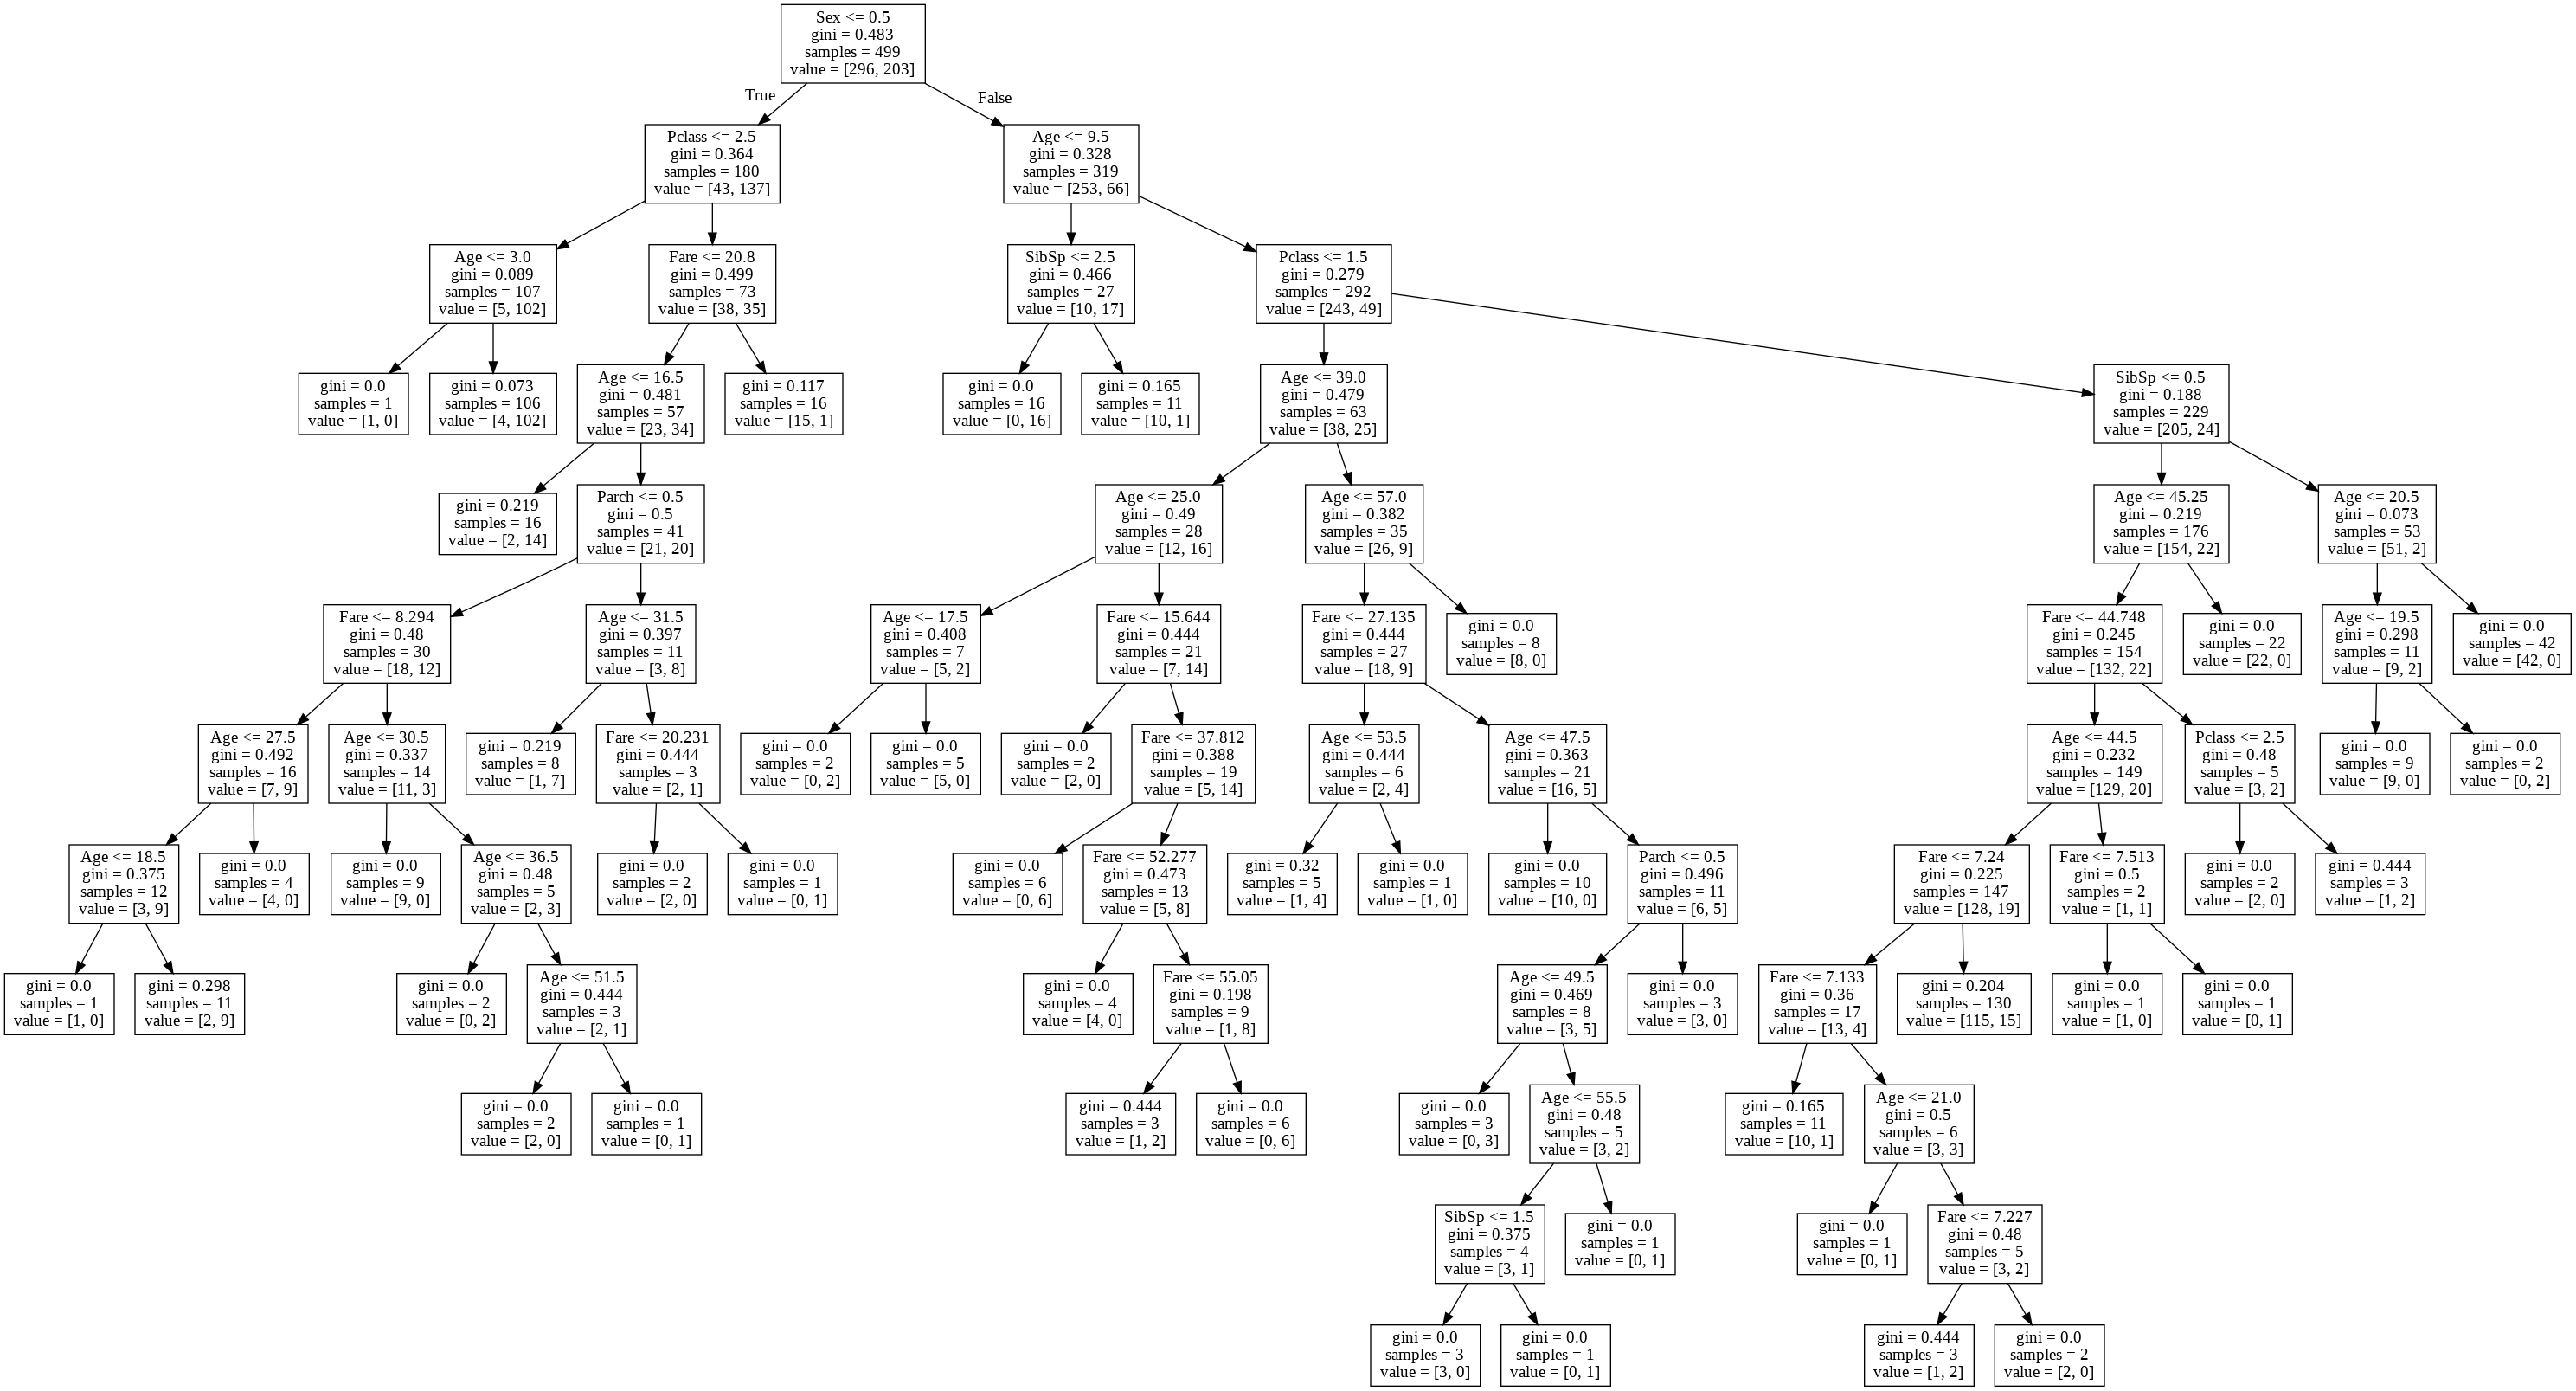

In [81]:
dot_data = StringIO()
export_graphviz(prune_classifier, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

# 과제

scikit-learn의 `DecisionTreeClassifier`에는 `max_leaf_nodes` 말고도 `max_depth`라는 파라미터가 있습니다. 이 파라미터는 결정트리의 최대 깊이(depth)를 지정합니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

* 과제 1: 위 제공된 링크의 `DecisionTreeClassifier` 다큐멘테이션을 읽고 max_leaf_nodes, max_depth, min_sample_split, min_sample_leaf, min_impurity_decrease 각각의 파라미터가 pruning에 있어서 어떤 역할을 하는지 설명하시오.
* 과제 2: 총 5개의 새로운 결정트리 모델을 생성해봅시다. 이 때 각각의 결정트리 모델은 max_leaf_nodes, max_depth, min_sample_split, min_sample_leaf, min_impurity_decrease의 다섯 pruning 파라미터 중 하나씩을 임의로 조정해주어야 합니다.(하나의 결정 트리는 하나의 pruning 파라미터만 조정하면 되고, 각각의 결정트리는 서로 다른 파라미터를 조정해야합니다.)
* 과제 3: pruning 파라미터를 조정한 5개의 결정트리에 대해 테스트셋에 대한 분류 정확도를 확인해보고, pruning 파라미터를 조정하지 않았던 결정트리의 분류 정확도와 비교해봅시다.
* 과제 4: 생성된 5개의 결정트리 모델 각각을 시각화해봅시다.

**과제 1**

- **max_leaf_nodes** : leaf node의 개수가 설정한 숫자 만큼 도달하면 더 이상 확장하지 않는다.
- **max_depth** : 트리의 깊이가 설정한 정도까지 도달하면 확장하지 않는다.
- **min_samples_split** : split을 하기 위한 필요한 최소 sample 개수이고, 초기값은 2이다. 즉, 현재 node의 sample 수가 설정한 값보다 작다면 확장하지 않는다.
- **min_samples_leaf** : leaf node에서 가져야할 최소 sample의 개수이고, 초기값은 1이다. 즉, 확장하는 지점에서 양쪽 자식노드의 sample 수가 설정한 숫자보다 작다면 확장하지 않을 것이다.
- **min_impurity_decrease** : 노드를 split 했을 때 impurity의 감소량이 설정 값보다 크거나 같을 경우에만 split 한다.

In [110]:
# 과제 2 - 총 5개의 새로운 결정트리 모델을 생성
prune_classifier_1 = DecisionTreeClassifier(max_leaf_nodes=20)
prune_classifier_2 = DecisionTreeClassifier(max_depth=7)
prune_classifier_3 = DecisionTreeClassifier(min_samples_split=30)
prune_classifier_4 = DecisionTreeClassifier(min_samples_leaf=30)
prune_classifier_5 = DecisionTreeClassifier(min_impurity_decrease= 0.01)

prune_classifier_1.fit(x_train, y_train) 
prune_classifier_2.fit(x_train, y_train)
prune_classifier_3.fit(x_train, y_train)
prune_classifier_4.fit(x_train, y_train)
prune_classifier_5.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
# 과제 3 - 분류 정확도 비교
# pruning 파라미터를 조정하지 않았던 결정트리의 분류 정확도 = 0.7023255813953488

print(prune_classifier_1.score(x_test, y_test))
print(prune_classifier_2.score(x_test, y_test))
print(prune_classifier_3.score(x_test, y_test))
print(prune_classifier_4.score(x_test, y_test))
print(prune_classifier_5.score(x_test, y_test))

# 모든 가지치기된 결정트리 모델에서 가지치기를 하지 않은 모델보다 
# test set에 대한정확도가 향상된 것을 확인할 수 있다.

0.7581395348837209
0.7534883720930232
0.7488372093023256
0.7627906976744186
0.8


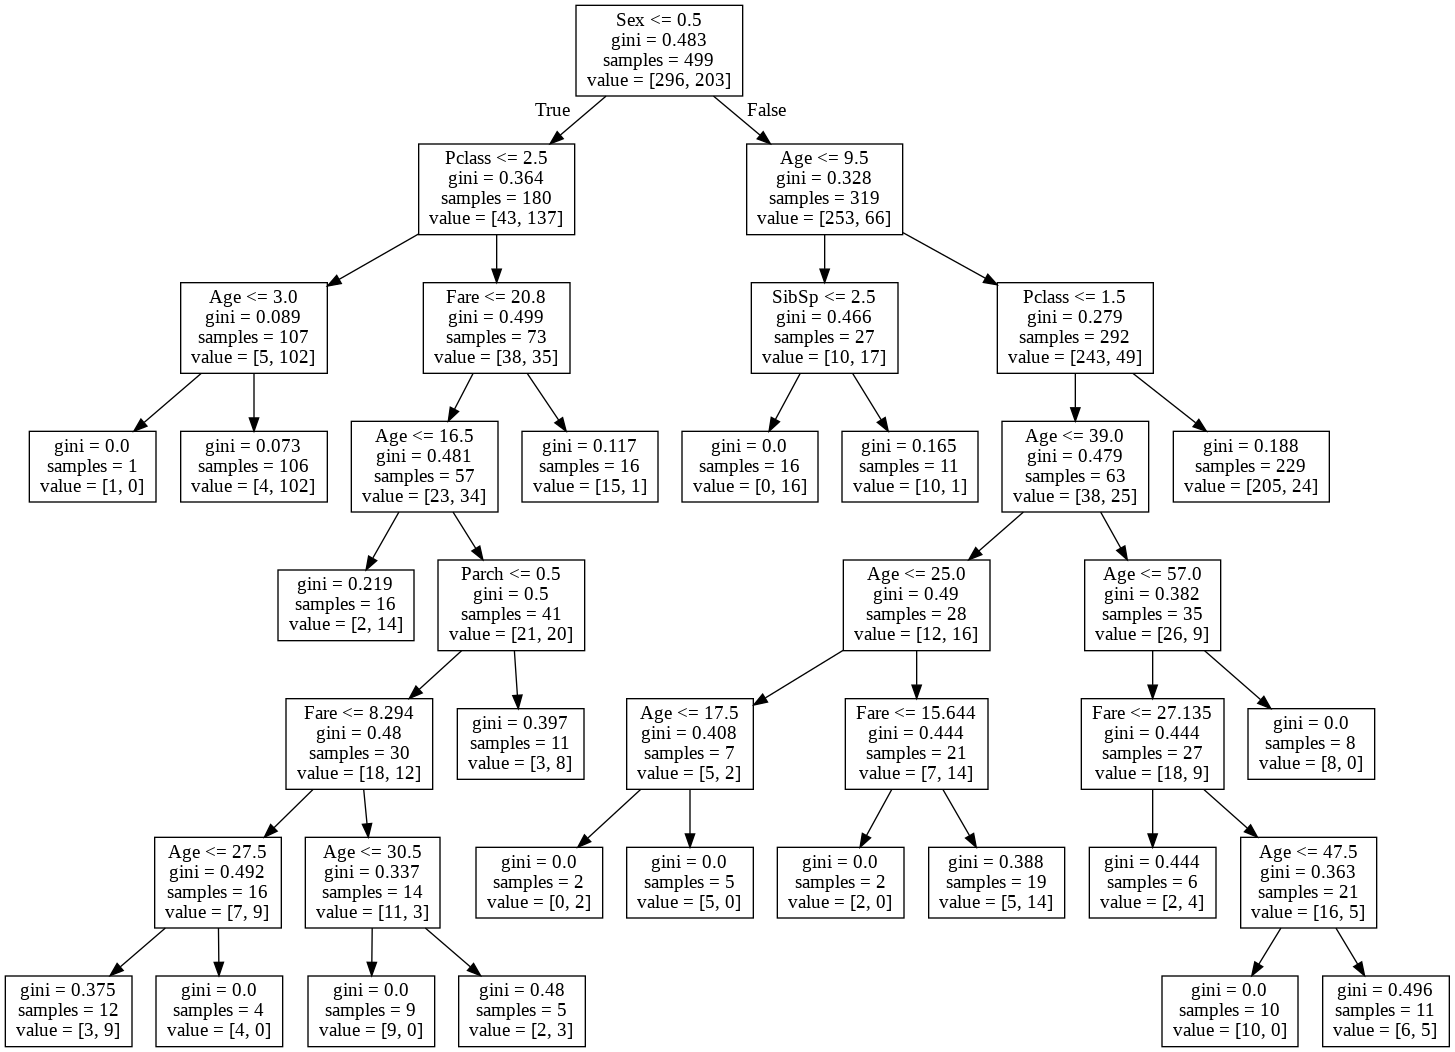

In [89]:
# 과제 4 - 트리 시각화
dot_data = StringIO()
export_graphviz(prune_classifier_1, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

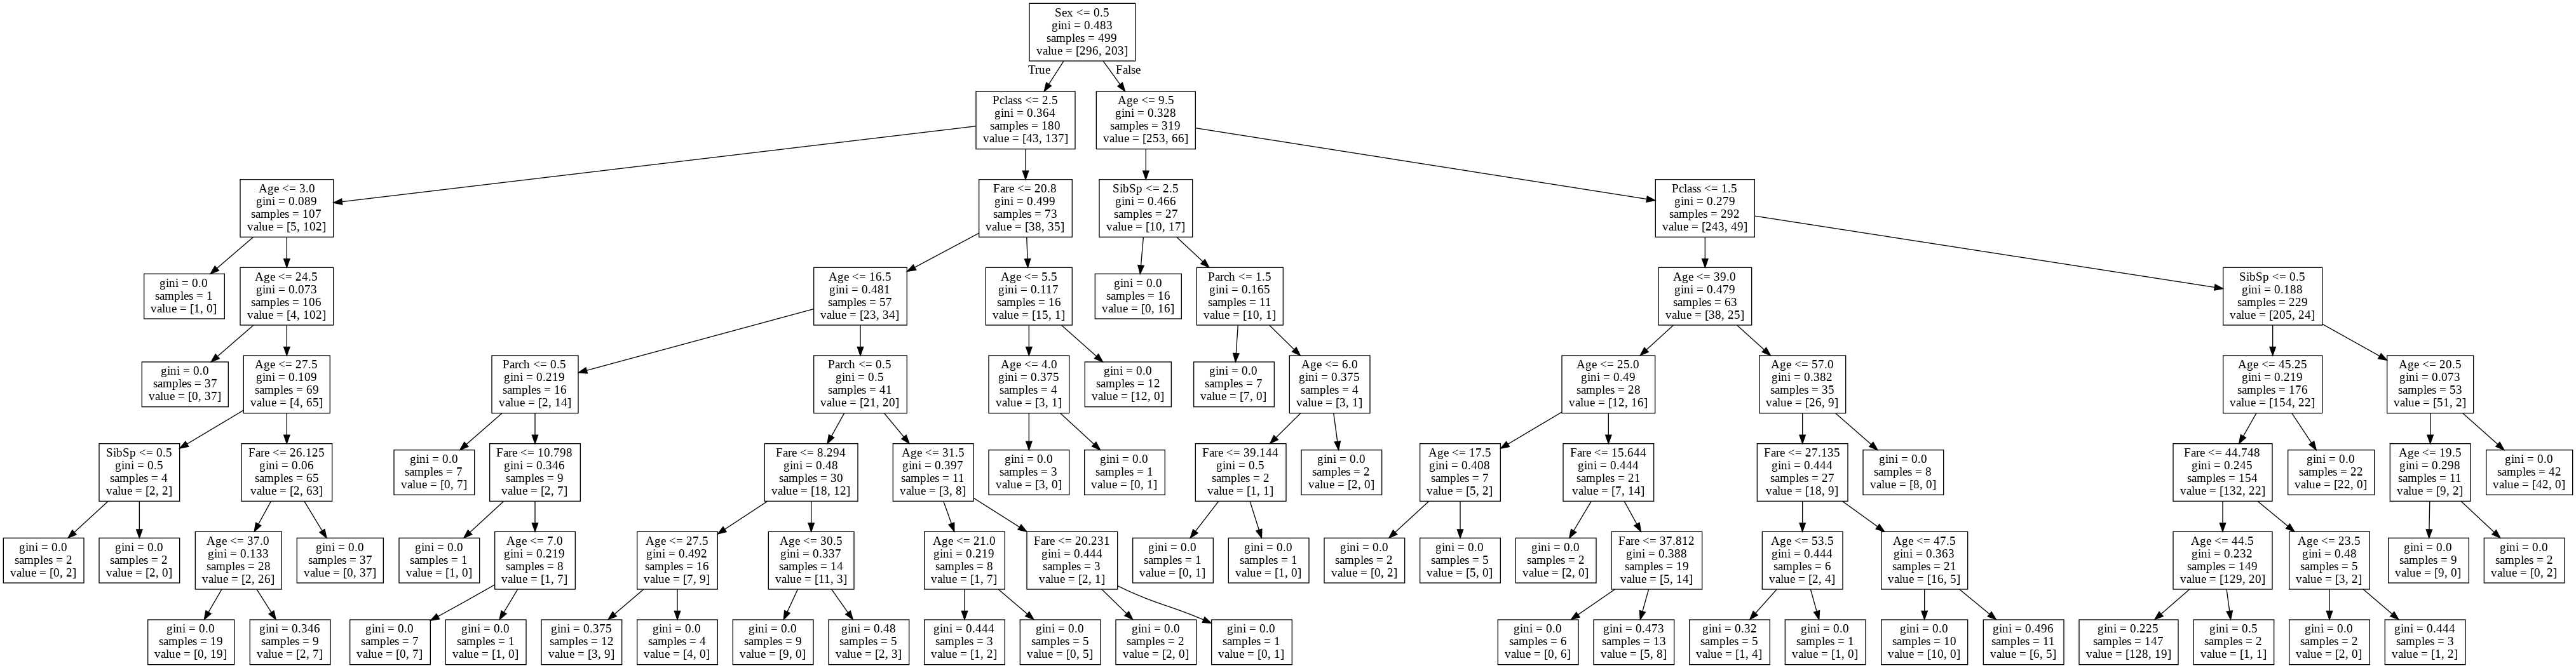

In [93]:
dot_data = StringIO()
export_graphviz(prune_classifier_2, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

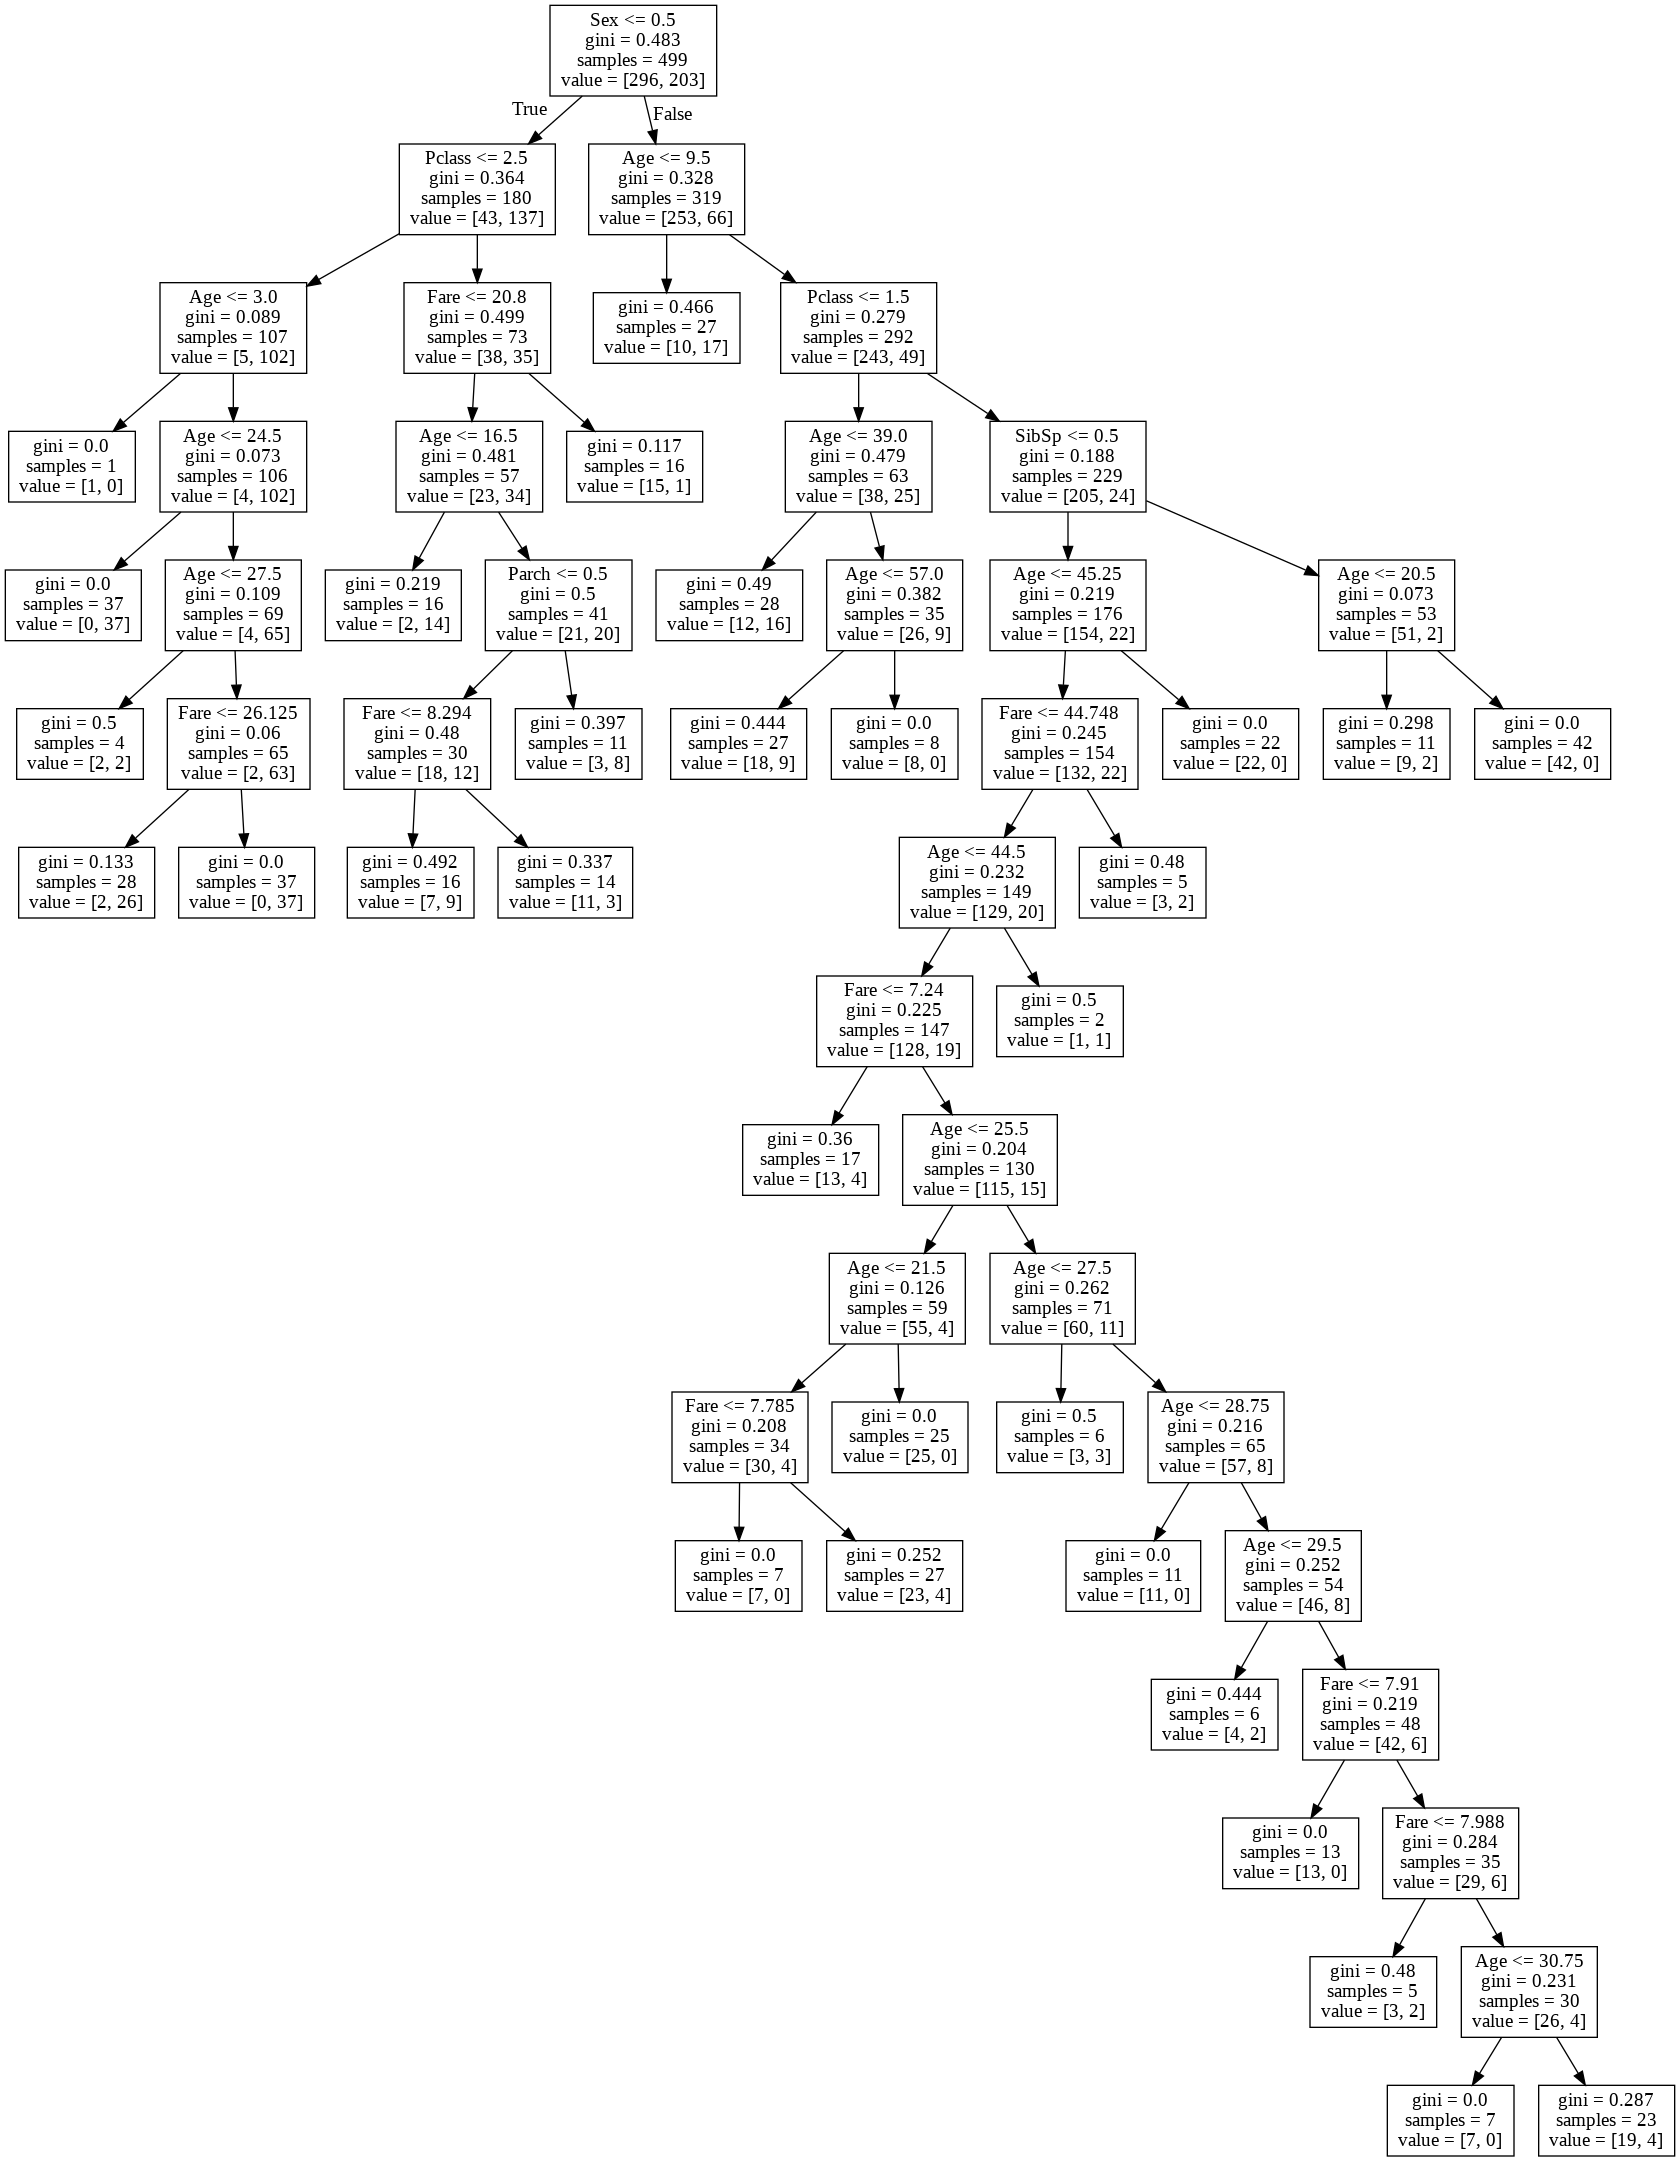

In [104]:
dot_data = StringIO()
export_graphviz(prune_classifier_3, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

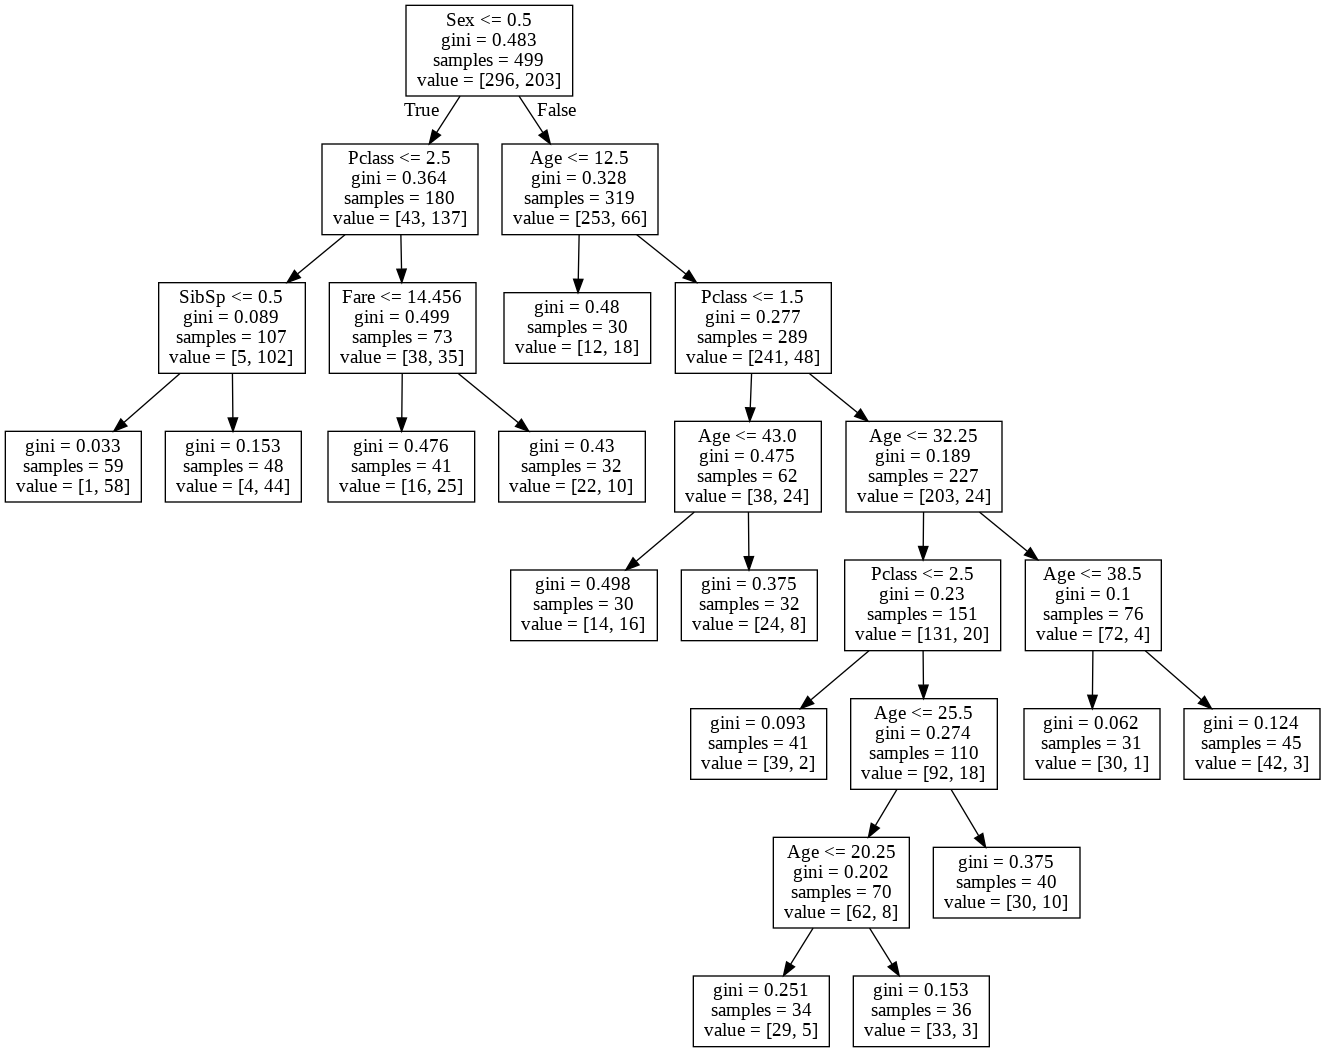

In [105]:
dot_data = StringIO()
export_graphviz(prune_classifier_4, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

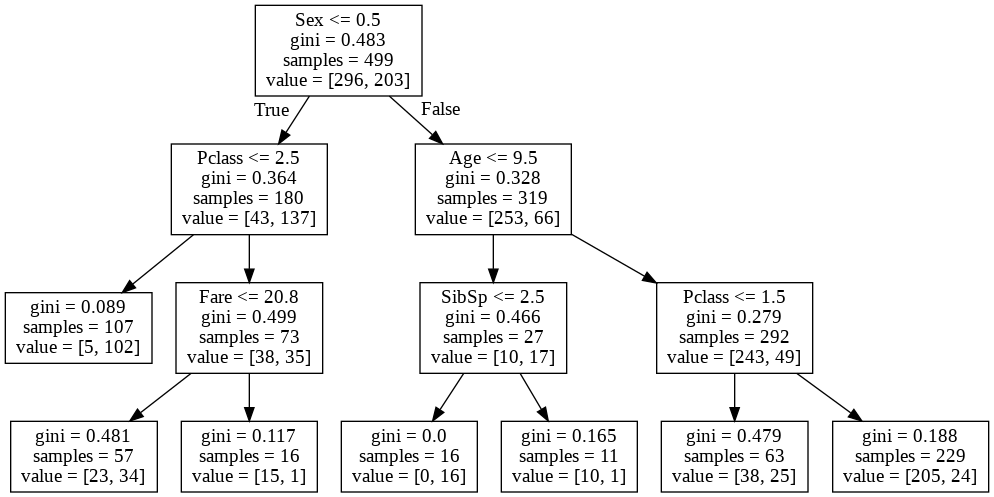

In [112]:
dot_data = StringIO()
export_graphviz(prune_classifier_5, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

# 추가 활동: 새로운 데이터 분류하기 (성적에 포함 안됨)

이제 우리의 트리를 분류기로 사용할 수 있습니다. 새로운 데이터 instance가 결정트리에 주어지면 트리 맨 위에서 시작하여 트리의 끝마디에 도달할 때까지 트리의 브랜치를 따라갑니다. 끝마디에 도달하면 해당 끝마디 데이터들의 label을 사용하여 분류를 합니다.
    
(이부분 말로합니다.) `build_tree()` 함수가 살짝 변경이 되었습니다. `Counter` 오브젝트인 브랜치의 리스트를 리턴하는 대신 `build_tree()` 는 `Leaf` 오브젝트나 `Internal_Node` 오브젝트를 리턴합니다. 이제 새로운 포인트들을 분류하는 새 함수를 써보겠습니다.

In [ ]:
from collections import Counter

def split(dataset, labels, column):
    data_subsets = []
    label_subsets = []
    counts = list(set([data[column] for data in dataset]))
    counts.sort()
    for k in counts:
        new_data_subset = []
        new_label_subset = []
        for i in range(len(dataset)):
            if dataset[i][column] == k:
                new_data_subset.append(dataset[i])
                new_label_subset.append(labels[i])
        data_subsets.append(new_data_subset)
        label_subsets.append(new_label_subset)
    return data_subsets, label_subsets

def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset) * len(subset)/len(starting_labels)
  return info_gain  

class Leaf:
    def __init__(self, labels, value):
        self.labels = Counter(labels)
        self.value = value

class Internal_Node:
    def __init__(self,
                 feature,
                 branches,
                 value):
        self.feature = feature
        self.branches = branches
        self.value = value

        
def find_best_split(dataset, labels):
    best_gain = 0
    best_feature = 0
    for feature in range(len(dataset[0])):
        data_subsets, label_subsets = split(dataset, labels, feature)
        gain = information_gain(labels, label_subsets)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    return best_feature, best_gain

def build_tree(data, labels, value = ""):
  best_feature, best_gain = find_best_split(data, labels)
  if best_gain == 0:
    return Leaf(Counter(labels), value) # <------ 이코드와
  data_subsets, label_subsets = split(data, labels, best_feature)
  branches = []
  for i in range(len(data_subsets)):
    branch = build_tree(data_subsets[i], label_subsets[i], data_subsets[i][0][best_feature])
    branches.append(branch)
  return Internal_Node(best_feature, branches, value) # <----- 이코드가 변경됨.
        
        
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""
    question_dict = {0: "Buying Price", 1:"Price of maintenance", 2:"Number of doors", 3:"Person Capacity", 4:"Size of luggage boot", 5:"Estimated Saftey"}
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + str(node.labels))
        return

    # Print the question at this node
    print (spacing + "Splitting on " + question_dict[node.feature])

    # Call this function recursively on the true branch
    for i in range(len(node.branches)):
        print (spacing + '--> Branch ' + node.branches[i].value+':')
        print_tree(node.branches[i], spacing + "  ")
        
cars = [['high', 'low', '5more', '4', 'big', 'high'], ['high', 'vhigh', '4', 'more', 'med', 'med'], ['high', 'med', '4', '2', 'med', 'high'], ['low', 'vhigh', '4', '2', 'med', 'med'], ['vhigh', 'low', '5more', '2', 'small', 'low'], ['vhigh', 'high', '5more', '4', 'small', 'low'], ['med', 'med', '2', 'more', 'small', 'med'], ['med', 'med', '2', 'more', 'small', 'high'], ['med', 'low', '2', '4', 'med', 'high'], ['high', 'vhigh', '4', '4', 'small', 'low'], ['vhigh', 'low', '5more', 'more', 'med', 'med'], ['vhigh', 'vhigh', '3', 'more', 'big', 'med'], ['high', 'med', '4', '4', 'small', 'high'], ['med', 'med', '5more', 'more', 'med', 'high'], ['low', 'vhigh', '4', 'more', 'small', 'med'], ['high', 'med', '4', '2', 'big', 'low'], ['vhigh', 'vhigh', '5more', '2', 'med', 'med'], ['low', 'vhigh', '2', '2', 'big', 'high'], ['med', 'high', '2', '4', 'med', 'low'], ['vhigh', 'med', '2', '4', 'med', 'low'], ['low', 'high', '3', '4', 'med', 'high'], ['med', 'low', '5more', '4', 'med', 'high'], ['high', 'high', '3', '2', 'big', 'low'], ['low', 'vhigh', '2', '4', 'big', 'low'], ['high', 'low', '4', '2', 'small', 'high'], ['vhigh', 'med', '5more', 'more', 'big', 'high'], ['vhigh', 'med', '5more', '2', 'small', 'low'], ['vhigh', 'med', '5more', '2', 'big', 'low'], ['med', 'vhigh', '4', 'more', 'med', 'high'], ['low', 'high', '2', 'more', 'small', 'low'], ['med', 'vhigh', '2', 'more', 'med', 'high'], ['low', 'vhigh', '5more', '2', 'small', 'high'], ['med', 'med', '4', '2', 'med', 'low'], ['med', 'low', '4', '4', 'big', 'high'], ['high', 'vhigh', '3', 'more', 'big', 'high'], ['high', 'high', '4', 'more', 'med', 'low'], ['vhigh', 'high', '5more', '2', 'small', 'low'], ['high', 'high', '3', '4', 'med', 'med'], ['high', 'low', '5more', '4', 'small', 'low'], ['low', 'vhigh', '5more', '2', 'med', 'high'], ['med', 'high', '3', '4', 'big', 'high'], ['med', 'low', '4', '2', 'big', 'low'], ['med', 'high', '2', '2', 'med', 'low'], ['low', 'vhigh', '3', 'more', 'med', 'high'], ['vhigh', 'low', '3', '4', 'big', 'low'], ['high', 'high', '2', 'more', 'big', 'med'], ['low', 'vhigh', '3', '2', 'med', 'low'], ['low', 'med', '5more', 'more', 'med', 'med'], ['high', 'med', '3', 'more', 'small', 'high'], ['high', 'med', '5more', 'more', 'big', 'high'], ['med', 'vhigh', '2', '2', 'med', 'high'], ['low', 'high', '3', '2', 'big', 'high'], ['vhigh', 'high', '3', 'more', 'big', 'low'], ['vhigh', 'med', '2', '2', 'big', 'low'], ['high', 'vhigh', '4', '4', 'big', 'med'], ['low', 'med', '4', 'more', 'med', 'low'], ['high', 'high', '3', '4', 'small', 'med'], ['med', 'low', '3', '4', 'small', 'high'], ['vhigh', 'vhigh', '5more', '2', 'big', 'low'], ['vhigh', 'med', '3', 'more', 'med', 'high'], ['high', 'low', '2', '4', 'med', 'high'], ['low', 'high', '4', '2', 'small', 'med'], ['high', 'med', '2', '4', 'med', 'high'], ['low', 'med', '3', '4', 'big', 'high'], ['high', 'low', '4', 'more', 'big', 'low'], ['high', 'low', '5more', '2', 'med', 'low'], ['low', 'high', '2', 'more', 'small', 'high'], ['med', 'high', '2', '2', 'big', 'high'], ['med', 'high', '3', '4', 'small', 'high'], ['high', 'high', '3', '4', 'med', 'high'], ['vhigh', 'med', '5more', '4', 'med', 'high'], ['vhigh', 'med', '4', '4', 'small', 'high'], ['high', 'low', '4', 'more', 'big', 'med'], ['high', 'med', '2', 'more', 'big', 'low'], ['low', 'vhigh', '3', '2', 'med', 'high'], ['vhigh', 'vhigh', '5more', '2', 'big', 'high'], ['low', 'high', '4', '4', 'med', 'high'], ['high', 'low', '4', 'more', 'big', 'high'], ['med', 'vhigh', '5more', '2', 'small', 'low'], ['high', 'med', '4', '4', 'med', 'low'], ['med', 'med', '3', '2', 'small', 'med'], ['vhigh', 'low', '3', 'more', 'med', 'high'], ['high', 'low', '2', '2', 'small', 'med'], ['med', 'med', '5more', 'more', 'big', 'high'], ['high', 'vhigh', '5more', '4', 'small', 'high'], ['med', 'med', '5more', 'more', 'small', 'high'], ['high', 'low', '4', '2', 'med', 'high'], ['low', 'high', '4', '2', 'big', 'high'], ['low', 'vhigh', '2', '4', 'med', 'med'], ['low', 'med', '5more', '2', 'big', 'high'], ['vhigh', 'vhigh', '5more', '4', 'big', 'low'], ['vhigh', 'med', '4', '2', 'small', 'high'], ['med', 'high', '4', '2', 'med', 'med'], ['high', 'vhigh', '3', '4', 'small', 'low'], ['low', 'low', '5more', 'more', 'big', 'low'], ['vhigh', 'high', '3', '2', 'big', 'med'], ['high', 'high', '3', '4', 'big', 'med'], ['low', 'high', '5more', '4', 'small', 'med'], ['vhigh', 'med', '4', '4', 'med', 'high'], ['med', 'vhigh', '4', '2', 'small', 'med'], ['med', 'med', '3', '2', 'big', 'high'], ['low', 'high', '4', '2', 'small', 'high'], ['vhigh', 'med', '2', '4', 'med', 'high'], ['high', 'med', '2', '2', 'small', 'med'], ['vhigh', 'low', '4', '2', 'big', 'med'], ['low', 'vhigh', '4', 'more', 'big', 'high'], ['low', 'high', '2', '2', 'big', 'low'], ['vhigh', 'low', '5more', '4', 'big', 'med'], ['med', 'vhigh', '5more', '4', 'med', 'med'], ['med', 'med', '2', '2', 'small', 'low'], ['med', 'med', '2', '2', 'med', 'med'], ['low', 'med', '3', 'more', 'med', 'low'], ['med', 'high', '4', '4', 'big', 'high'], ['vhigh', 'vhigh', '2', '2', 'big', 'med'], ['high', 'med', '5more', '2', 'small', 'high'], ['low', 'high', '5more', '2', 'small', 'high'], ['low', 'med', '2', 'more', 'small', 'low'], ['low', 'high', '5more', '2', 'med', 'med'], ['high', 'med', '5more', '4', 'big', 'low'], ['vhigh', 'low', '3', 'more', 'big', 'high'], ['med', 'vhigh', '5more', 'more', 'med', 'low'], ['vhigh', 'med', '5more', '2', 'small', 'high'], ['low', 'vhigh', '2', '4', 'med', 'high'], ['med', 'low', '2', 'more', 'med', 'low'], ['high', 'low', '3', '2', 'med', 'high'], ['low', 'med', '4', 'more', 'big', 'low'], ['low', 'vhigh', '2', '4', 'big', 'high'], ['low', 'med', '3', '4', 'small', 'low'], ['low', 'med', '4', 'more', 'small', 'high'], ['med', 'low', '3', 'more', 'med', 'med'], ['high', 'med', '2', 'more', 'small', 'low'], ['med', 'vhigh', '4', 'more', 'med', 'low'], ['med', 'vhigh', '5more', '2', 'med', 'high'], ['med', 'vhigh', '3', '2', 'big', 'low'], ['vhigh', 'high', '5more', '2', 'big', 'high'], ['low', 'high', '3', '4', 'big', 'med'], ['high', 'high', '2', '2', 'med', 'low'], ['high', 'vhigh', '5more', '2', 'med', 'low'], ['vhigh', 'high', '5more', 'more', 'small', 'high'], ['high', 'low', '5more', 'more', 'big', 'low'], ['vhigh', 'low', '2', '4', 'med', 'high'], ['vhigh', 'vhigh', '3', 'more', 'small', 'high'], ['high', 'low', '2', 'more', 'med', 'low'], ['high', 'high', '3', 'more', 'small', 'med'], ['low', 'vhigh', '2', '2', 'big', 'low'], ['low', 'vhigh', '5more', '4', 'med', 'low'], ['med', 'vhigh', '4', '4', 'med', 'high'], ['vhigh', 'low', '2', 'more', 'small', 'med'], ['low', 'low', '5more', '4', 'small', 'low'], ['high', 'vhigh', '4', '4', 'med', 'med'], ['low', 'vhigh', '2', 'more', 'small', 'med'], ['high', 'high', '4', '4', 'small', 'med'], ['low', 'low', '4', '4', 'small', 'low'], ['high', 'high', '3', 'more', 'med', 'med'], ['high', 'med', '3', 'more', 'small', 'low'], ['med', 'vhigh', '3', '4', 'small', 'med'], ['high', 'high', '4', '2', 'med', 'med'], ['med', 'med', '3', '2', 'med', 'med'], ['vhigh', 'med', '5more', '2', 'big', 'high'], ['low', 'high', '3', '4', 'med', 'low'], ['low', 'low', '4', '4', 'big', 'med'], ['low', 'high', '2', 'more', 'med', 'high'], ['high', 'low', '4', '4', 'med', 'med'], ['low', 'vhigh', '2', '2', 'big', 'med'], ['high', 'vhigh', '4', '2', 'big', 'low'], ['vhigh', 'high', '4', '4', 'med', 'med'], ['vhigh', 'high', '2', 'more', 'small', 'high'], ['vhigh', 'vhigh', '2', 'more', 'med', 'med'], ['vhigh', 'high', '4', 'more', 'small', 'med'], ['high', 'high', '3', '2', 'med', 'high'], ['high', 'high', '4', 'more', 'big', 'low'], ['low', 'med', '4', '2', 'small', 'med'], ['med', 'vhigh', '3', 'more', 'big', 'low'], ['low', 'vhigh', '2', 'more', 'big', 'high'], ['high', 'high', '4', '2', 'med', 'high'], ['low', 'med', '4', '2', 'med', 'med'], ['vhigh', 'low', '5more', '4', 'big', 'low'], ['high', 'vhigh', '4', '4', 'small', 'high'], ['med', 'med', '2', '2', 'big', 'high'], ['high', 'med', '3', 'more', 'med', 'low'], ['low', 'med', '3', '2', 'small', 'high'], ['vhigh', 'med', '4', 'more', 'small', 'low'], ['med', 'vhigh', '3', '4', 'big', 'med'], ['low', 'low', '2', '2', 'med', 'low'], ['med', 'high', '4', '2', 'small', 'med'], ['high', 'high', '4', '4', 'med', 'high'], ['med', 'low', '5more', 'more', 'big', 'low'], ['vhigh', 'med', '2', '4', 'small', 'low'], ['vhigh', 'low', '3', '4', 'big', 'med'], ['vhigh', 'vhigh', '5more', '4', 'big', 'high'], ['med', 'med', '5more', '4', 'med', 'high'], ['vhigh', 'high', '2', 'more', 'small', 'med'], ['med', 'med', '4', 'more', 'small', 'med'], ['high', 'low', '2', '4', 'big', 'med'], ['high', 'low', '2', 'more', 'big', 'high'], ['high', 'high', '2', '4', 'small', 'high'], ['high', 'high', '4', '2', 'big', 'med'], ['low', 'vhigh', '5more', '2', 'small', 'med'], ['high', 'med', '4', '2', 'small', 'low'], ['low', 'med', '4', '4', 'med', 'high'], ['vhigh', 'high', '5more', '4', 'med', 'low'], ['high', 'med', '5more', '4', 'med', 'high'], ['vhigh', 'med', '3', 'more', 'med', 'med'], ['med', 'low', '3', '4', 'med', 'low'], ['vhigh', 'med', '3', '2', 'big', 'med'], ['vhigh', 'low', '2', '4', 'small', 'high'], ['high', 'high', '3', 'more', 'big', 'med'], ['high', 'med', '3', 'more', 'med', 'med'], ['vhigh', 'high', '5more', 'more', 'big', 'med'], ['vhigh', 'low', '4', 'more', 'small', 'high'], ['med', 'med', '3', '2', 'small', 'high'], ['vhigh', 'low', '4', '4', 'small', 'low'], ['med', 'high', '2', '4', 'small', 'low'], ['high', 'high', '2', 'more', 'med', 'med'], ['vhigh', 'low', '4', 'more', 'small', 'med'], ['med', 'low', '3', '4', 'big', 'med'], ['med', 'high', '2', '2', 'med', 'high'], ['low', 'vhigh', '3', 'more', 'big', 'med'], ['vhigh', 'high', '2', '4', 'small', 'med'], ['med', 'low', '3', '2', 'med', 'med'], ['high', 'low', '5more', '2', 'small', 'med'], ['high', 'vhigh', '3', '2', 'med', 'low'], ['vhigh', 'low', '2', '2', 'big', 'med'], ['high', 'vhigh', '3', 'more', 'small', 'high'], ['vhigh', 'low', '3', '4', 'med', 'med'], ['high', 'vhigh', '4', '4', 'small', 'med'], ['high', 'low', '5more', '4', 'med', 'high'], ['high', 'low', '4', '2', 'med', 'low'], ['low', 'med', '5more', '4', 'small', 'low'], ['vhigh', 'vhigh', '3', '2', 'big', 'low'], ['vhigh', 'low', '4', '4', 'big', 'high'], ['med', 'low', '5more', '2', 'small', 'med'], ['med', 'vhigh', '5more', 'more', 'small', 'high'], ['med', 'med', '2', 'more', 'big', 'med'], ['vhigh', 'high', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '5more', '2', 'med', 'high'], ['med', 'high', '3', 'more', 'small', 'med'], ['low', 'high', '2', 'more', 'med', 'med'], ['vhigh', 'med', '3', 'more', 'med', 'low'], ['vhigh', 'med', '3', '4', 'big', 'med'], ['low', 'low', '4', '4', 'big', 'high'], ['high', 'high', '3', '4', 'big', 'high'], ['med', 'high', '5more', '4', 'big', 'low'], ['vhigh', 'high', '3', '4', 'small', 'low'], ['high', 'vhigh', '3', 'more', 'small', 'med'], ['med', 'low', '4', '4', 'big', 'low'], ['low', 'vhigh', '5more', '2', 'big', 'high'], ['med', 'high', '4', '2', 'med', 'high'], ['med', 'med', '4', '2', 'big', 'low'], ['vhigh', 'low', '4', '2', 'med', 'high'], ['vhigh', 'vhigh', '4', 'more', 'big', 'high'], ['vhigh', 'vhigh', '3', '2', 'small', 'low'], ['low', 'vhigh', '5more', '4', 'small', 'low'], ['med', 'med', '2', 'more', 'small', 'low'], ['high', 'med', '4', 'more', 'med', 'low'], ['vhigh', 'low', '4', '4', 'big', 'med'], ['vhigh', 'low', '2', '4', 'big', 'low'], ['med', 'high', '3', '2', 'med', 'low'], ['low', 'vhigh', '5more', '4', 'small', 'med'], ['low', 'med', '3', '2', 'big', 'med'], ['vhigh', 'high', '3', 'more', 'big', 'med'], ['vhigh', 'med', '5more', '4', 'big', 'low'], ['med', 'low', '5more', '2', 'med', 'high'], ['high', 'high', '2', 'more', 'small', 'low'], ['low', 'vhigh', '3', '2', 'big', 'low'], ['vhigh', 'vhigh', '3', '4', 'big', 'high'], ['high', 'med', '5more', 'more', 'big', 'low'], ['vhigh', 'high', '3', '2', 'small', 'high'], ['med', 'high', '5more', '2', 'big', 'low'], ['med', 'low', '5more', 'more', 'small', 'med'], ['low', 'med', '3', '4', 'med', 'low'], ['med', 'low', '5more', '2', 'small', 'high'], ['low', 'vhigh', '3', '2', 'small', 'low'], ['med', 'low', '3', '2', 'small', 'med'], ['vhigh', 'low', '2', '4', 'med', 'med'], ['low', 'low', '5more', '2', 'small', 'low'], ['high', 'vhigh', '2', '4', 'big', 'high'], ['low', 'vhigh', '4', 'more', 'med', 'med'], ['vhigh', 'med', '3', '4', 'small', 'high'], ['high', 'low', '5more', 'more', 'big', 'high'], ['high', 'high', '4', 'more', 'small', 'med'], ['vhigh', 'vhigh', '2', 'more', 'small', 'med'], ['vhigh', 'high', '5more', 'more', 'med', 'low'], ['med', 'med', '4', 'more', 'big', 'low'], ['vhigh', 'med', '2', '2', 'big', 'med'], ['low', 'med', '4', '4', 'small', 'med'], ['med', 'vhigh', '3', '2', 'small', 'med'], ['vhigh', 'high', '4', '4', 'small', 'low'], ['med', 'high', '2', '4', 'med', 'med'], ['low', 'low', '2', 'more', 'small', 'low'], ['high', 'med', '2', '4', 'small', 'med'], ['med', 'vhigh', '3', '2', 'med', 'med'], ['high', 'med', '3', '2', 'med', 'med'], ['low', 'low', '2', '4', 'med', 'high'], ['med', 'med', '3', '4', 'small', 'med'], ['vhigh', 'low', '2', '4', 'small', 'med'], ['vhigh', 'high', '4', 'more', 'small', 'low'], ['vhigh', 'low', '5more', '2', 'med', 'med'], ['med', 'low', '2', '2', 'med', 'high'], ['med', 'high', '2', '4', 'small', 'high'], ['vhigh', 'vhigh', '4', '2', 'med', 'med'], ['vhigh', 'vhigh', '4', 'more', 'med', 'high'], ['high', 'med', '4', 'more', 'med', 'high'], ['vhigh', 'high', '3', '4', 'big', 'high'], ['low', 'vhigh', '5more', 'more', 'med', 'low'], ['high', 'vhigh', '3', '4', 'small', 'med'], ['vhigh', 'high', '4', 'more', 'med', 'low'], ['med', 'low', '5more', 'more', 'small', 'high'], ['low', 'low', '4', '4', 'med', 'med'], ['vhigh', 'vhigh', '4', '4', 'big', 'med'], ['high', 'high', '2', 'more', 'big', 'high'], ['med', 'vhigh', '2', '2', 'small', 'med'], ['vhigh', 'vhigh', '3', '4', 'small', 'med'], ['low', 'vhigh', '3', '2', 'big', 'med'], ['low', 'vhigh', '2', '4', 'small', 'med'], ['high', 'med', '2', '2', 'big', 'low'], ['high', 'med', '3', 'more', 'small', 'med'], ['low', 'low', '5more', '2', 'big', 'high'], ['low', 'vhigh', '2', '2', 'med', 'low'], ['vhigh', 'low', '5more', '4', 'med', 'low'], ['low', 'low', '5more', '4', 'big', 'low'], ['vhigh', 'vhigh', '4', '4', 'med', 'med'], ['low', 'low', '2', 'more', 'med', 'low'], ['med', 'med', '4', '2', 'med', 'med'], ['low', 'high', '4', '4', 'med', 'med'], ['vhigh', 'med', '3', '4', 'big', 'low'], ['low', 'high', '5more', 'more', 'small', 'high'], ['high', 'vhigh', '2', '2', 'big', 'med'], ['high', 'high', '4', '4', 'big', 'med'], ['high', 'med', '5more', '4', 'small', 'high'], ['low', 'high', '5more', '2', 'big', 'med'], ['med', 'low', '2', 'more', 'small', 'low'], ['vhigh', 'vhigh', '2', '4', 'med', 'high'], ['high', 'high', '5more', '2', 'med', 'med'], ['vhigh', 'vhigh', '4', 'more', 'big', 'med'], ['vhigh', 'vhigh', '5more', '4', 'big', 'med'], ['high', 'med', '4', 'more', 'big', 'med'], ['low', 'med', '5more', 'more', 'med', 'low'], ['vhigh', 'low', '2', 'more', 'big', 'high'], ['med', 'med', '4', 'more', 'small', 'low'], ['med', 'med', '3', '4', 'med', 'med'], ['med', 'low', '5more', 'more', 'med', 'med'], ['low', 'high', '5more', '4', 'big', 'low'], ['high', 'med', '2', '2', 'small', 'high'], ['med', 'vhigh', '4', '4', 'big', 'med'], ['low', 'med', '4', '2', 'med', 'high'], ['low', 'vhigh', '3', 'more', 'small', 'high'], ['high', 'low', '2', '4', 'small', 'med'], ['high', 'high', '5more', 'more', 'big', 'low'], ['low', 'vhigh', '5more', '4', 'small', 'high'], ['med', 'med', '3', '2', 'med', 'low'], ['vhigh', 'low', '5more', 'more', 'small', 'low'], ['med', 'med', '2', '2', 'med', 'low'], ['med', 'high', '3', '4', 'med', 'med'], ['low', 'high', '3', '4', 'small', 'low'], ['med', 'vhigh', '3', '4', 'med', 'med'], ['low', 'low', '2', '4', 'big', 'high'], ['low', 'low', '3', 'more', 'big', 'low'], ['vhigh', 'med', '4', '4', 'small', 'med'], ['vhigh', 'vhigh', '2', '4', 'med', 'med'], ['vhigh', 'high', '3', '4', 'small', 'high'], ['high', 'low', '4', 'more', 'med', 'low'], ['low', 'med', '5more', 'more', 'med', 'high'], ['high', 'vhigh', '4', '4', 'med', 'low'], ['vhigh', 'low', '4', 'more', 'big', 'low'], ['med', 'vhigh', '3', 'more', 'med', 'med'], ['low', 'med', '5more', '4', 'med', 'low'], ['vhigh', 'vhigh', '4', 'more', 'med', 'low'], ['vhigh', 'low', '5more', 'more', 'small', 'med'], ['med', 'med', '4', '4', 'small', 'high'], ['low', 'low', '3', '4', 'small', 'high'], ['high', 'low', '2', '4', 'med', 'low'], ['high', 'low', '3', '4', 'med', 'med'], ['vhigh', 'vhigh', '5more', '4', 'small', 'low'], ['high', 'med', '4', 'more', 'small', 'high'], ['vhigh', 'vhigh', '3', '4', 'small', 'high'], ['med', 'high', '3', 'more', 'big', 'low'], ['med', 'low', '5more', '2', 'small', 'low'], ['vhigh', 'med', '2', 'more', 'big', 'med'], ['low', 'med', '2', '4', 'big', 'med'], ['vhigh', 'med', '4', 'more', 'med', 'med'], ['high', 'low', '3', '4', 'small', 'low'], ['low', 'vhigh', '5more', '4', 'big', 'low'], ['med', 'low', '5more', 'more', 'big', 'high'], ['vhigh', 'high', '4', 'more', 'med', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'high'], ['low', 'low', '5more', '2', 'med', 'high'], ['high', 'low', '4', '2', 'med', 'med'], ['high', 'low', '3', 'more', 'med', 'high'], ['high', 'med', '3', '4', 'med', 'low'], ['med', 'vhigh', '3', '2', 'med', 'low'], ['high', 'med', '5more', '2', 'med', 'med'], ['high', 'low', '4', '2', 'small', 'low'], ['med', 'high', '5more', '4', 'med', 'low'], ['vhigh', 'med', '2', '4', 'big', 'high'], ['low', 'vhigh', '2', '2', 'med', 'high'], ['vhigh', 'med', '5more', 'more', 'med', 'low'], ['med', 'low', '4', '2', 'small', 'high'], ['vhigh', 'high', '2', '2', 'med', 'low'], ['low', 'high', '5more', 'more', 'med', 'low'], ['low', 'low', '2', '4', 'small', 'low'], ['low', 'high', '5more', '4', 'med', 'med'], ['med', 'low', '3', 'more', 'med', 'low'], ['high', 'low', '3', '4', 'small', 'med'], ['high', 'high', '2', '2', 'small', 'high'], ['high', 'low', '3', '4', 'med', 'high'], ['low', 'med', '2', 'more', 'med', 'med'], ['low', 'med', '3', '4', 'med', 'med'], ['med', 'high', '4', 'more', 'small', 'high'], ['high', 'med', '2', 'more', 'small', 'med'], ['low', 'low', '4', 'more', 'med', 'low'], ['med', 'high', '5more', '2', 'med', 'low'], ['high', 'low', '2', 'more', 'med', 'high'], ['high', 'high', '3', '4', 'small', 'low'], ['med', 'vhigh', '5more', '4', 'big', 'med'], ['high', 'low', '4', '4', 'big', 'med'], ['low', 'high', '5more', '2', 'small', 'low'], ['med', 'vhigh', '2', 'more', 'med', 'med'], ['low', 'med', '5more', '4', 'small', 'high'], ['vhigh', 'vhigh', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '5more', '2', 'small', 'med'], ['low', 'med', '2', '2', 'big', 'med'], ['low', 'low', '5more', '4', 'big', 'med'], ['high', 'low', '5more', 'more', 'big', 'med'], ['low', 'vhigh', '3', '4', 'small', 'med'], ['low', 'low', '2', '2', 'small', 'high'], ['vhigh', 'high', '2', '4', 'med', 'med'], ['med', 'low', '5more', '4', 'big', 'high'], ['med', 'high', '4', '2', 'big', 'high'], ['low', 'low', '4', 'more', 'big', 'high'], ['low', 'low', '5more', 'more', 'big', 'high'], ['med', 'low', '3', '2', 'small', 'high'], ['high', 'med', '4', '4', 'med', 'high'], ['med', 'vhigh', '2', 'more', 'med', 'low'], ['med', 'vhigh', '4', '4', 'big', 'low'], ['med', 'low', '3', '4', 'small', 'low'], ['low', 'med', '4', '4', 'big', 'low'], ['high', 'vhigh', '5more', 'more', 'big', 'high'], ['high', 'med', '2', '2', 'big', 'med'], ['med', 'high', '3', '2', 'big', 'med'], ['high', 'vhigh', '2', '2', 'small', 'low'], ['high', 'high', '5more', '4', 'med', 'high'], ['low', 'med', '4', 'more', 'small', 'low'], ['high', 'high', '4', '2', 'small', 'high'], ['vhigh', 'med', '4', 'more', 'med', 'high'], ['high', 'med', '2', 'more', 'med', 'med'], ['med', 'med', '3', 'more', 'big', 'med'], ['low', 'high', '3', '2', 'big', 'low'], ['high', 'med', '3', '4', 'small', 'low'], ['vhigh', 'low', '4', '4', 'med', 'low'], ['low', 'vhigh', '2', '2', 'small', 'high'], ['med', 'low', '2', '2', 'big', 'med'], ['low', 'low', '3', '2', 'big', 'low'], ['med', 'vhigh', '2', 'more', 'small', 'high'], ['vhigh', 'med', '4', 'more', 'small', 'high'], ['med', 'med', '3', '4', 'big', 'low'], ['med', 'vhigh', '2', '4', 'med', 'low'], ['high', 'high', '4', '4', 'big', 'low'], ['med', 'med', '2', '4', 'med', 'high'], ['vhigh', 'high', '4', '2', 'big', 'high'], ['high', 'low', '2', 'more', 'small', 'med'], ['vhigh', 'high', '4', '2', 'med', 'high'], ['vhigh', 'med', '5more', '4', 'big', 'med'], ['low', 'low', '4', '2', 'small', 'med'], ['vhigh', 'high', '2', '2', 'big', 'low'], ['low', 'med', '4', 'more', 'med', 'high'], ['med', 'high', '5more', 'more', 'big', 'high'], ['low', 'med', '5more', '2', 'small', 'low'], ['vhigh', 'low', '2', '2', 'med', 'low'], ['med', 'vhigh', '2', '4', 'small', 'med'], ['low', 'vhigh', '5more', '4', 'med', 'high'], ['vhigh', 'vhigh', '2', '2', 'small', 'high'], ['low', 'med', '2', '4', 'big', 'high'], ['high', 'vhigh', '3', '2', 'small', 'low'], ['vhigh', 'low', '2', '4', 'small', 'low'], ['med', 'high', '3', '2', 'big', 'low'], ['high', 'vhigh', '4', 'more', 'small', 'high'], ['vhigh', 'high', '4', '2', 'big', 'low'], ['vhigh', 'vhigh', '2', '2', 'med', 'med'], ['high', 'low', '2', '2', 'small', 'low'], ['vhigh', 'low', '3', '4', 'small', 'high'], ['vhigh', 'low', '3', '4', 'med', 'high'], ['med', 'high', '3', 'more', 'med', 'med'], ['med', 'med', '5more', '2', 'small', 'low'], ['med', 'vhigh', '5more', 'more', 'big', 'low'], ['vhigh', 'vhigh', '2', '4', 'big', 'low'], ['high', 'med', '4', 'more', 'small', 'med'], ['low', 'high', '4', '4', 'small', 'high'], ['med', 'low', '4', '4', 'big', 'med'], ['low', 'med', '3', '2', 'big', 'high'], ['high', 'vhigh', '2', 'more', 'med', 'low'], ['low', 'med', '2', 'more', 'small', 'high'], ['low', 'med', '5more', '2', 'big', 'low'], ['high', 'high', '4', '2', 'big', 'low'], ['high', 'med', '3', '2', 'big', 'med'], ['med', 'vhigh', '5more', 'more', 'big', 'high'], ['high', 'high', '5more', 'more', 'med', 'med'], ['vhigh', 'med', '5more', '4', 'small', 'med'], ['low', 'high', '5more', '4', 'med', 'low'], ['high', 'high', '2', '4', 'med', 'high'], ['high', 'med', '5more', 'more', 'small', 'low'], ['high', 'high', '3', 'more', 'big', 'low'], ['high', 'vhigh', '3', '4', 'med', 'high'], ['low', 'high', '4', '4', 'big', 'low'], ['vhigh', 'low', '4', '2', 'med', 'med'], ['vhigh', 'vhigh', '5more', '4', 'small', 'med'], ['low', 'vhigh', '4', '4', 'small', 'low'], ['vhigh', 'low', '3', 'more', 'big', 'low'], ['vhigh', 'high', '4', '2', 'small', 'low'], ['high', 'high', '3', '2', 'small', 'low'], ['vhigh', 'high', '4', '2', 'med', 'low'], ['high', 'low', '2', '2', 'med', 'low'], ['low', 'med', '4', 'more', 'big', 'high'], ['vhigh', 'high', '2', '4', 'small', 'low'], ['low', 'low', '5more', '2', 'small', 'high'], ['low', 'low', '3', '2', 'small', 'high'], ['med', 'med', '2', '2', 'big', 'med'], ['high', 'high', '5more', '4', 'small', 'high'], ['vhigh', 'low', '5more', '2', 'med', 'high'], ['vhigh', 'vhigh', '2', '4', 'small', 'high'], ['med', 'low', '4', '2', 'med', 'low'], ['low', 'high', '4', '4', 'big', 'med'], ['low', 'low', '2', 'more', 'big', 'low'], ['vhigh', 'low', '5more', '4', 'small', 'low'], ['high', 'low', '5more', '4', 'small', 'med'], ['vhigh', 'med', '4', '2', 'small', 'low'], ['high', 'low', '2', '2', 'small', 'high'], ['low', 'vhigh', '3', '4', 'small', 'low'], ['low', 'med', '4', '4', 'small', 'low'], ['low', 'med', '2', '4', 'big', 'low'], ['med', 'med', '2', '4', 'big', 'low'], ['vhigh', 'high', '4', '4', 'big', 'med'], ['vhigh', 'med', '2', 'more', 'med', 'high'], ['low', 'high', '4', 'more', 'big', 'med'], ['low', 'med', '4', '2', 'big', 'low'], ['high', 'med', '2', '2', 'med', 'high'], ['low', 'high', '2', 'more', 'big', 'high'], ['high', 'vhigh', '3', '2', 'med', 'med'], ['vhigh', 'low', '4', 'more', 'med', 'low'], ['low', 'vhigh', '4', '4', 'med', 'low'], ['high', 'low', '5more', '2', 'big', 'high'], ['high', 'vhigh', '5more', 'more', 'small', 'high'], ['high', 'med', '5more', '2', 'small', 'med'], ['med', 'low', '4', 'more', 'big', 'high'], ['med', 'high', '2', 'more', 'big', 'high'], ['high', 'med', '4', 'more', 'big', 'low'], ['low', 'high', '2', '2', 'med', 'high'], ['high', 'vhigh', '5more', '2', 'med', 'med'], ['vhigh', 'high', '2', '2', 'med', 'med'], ['med', 'vhigh', '2', 'more', 'big', 'high'], ['vhigh', 'low', '3', 'more', 'small', 'med'], ['vhigh', 'med', '4', 'more', 'big', 'med'], ['med', 'low', '3', '4', 'med', 'med'], ['med', 'low', '3', '4', 'med', 'high'], ['med', 'med', '5more', '2', 'big', 'med'], ['med', 'med', '3', 'more', 'med', 'low'], ['low', 'low', '4', '4', 'med', 'low'], ['high', 'vhigh', '5more', 'more', 'med', 'low'], ['med', 'high', '4', '4', 'med', 'low'], ['low', 'high', '4', 'more', 'med', 'low'], ['low', 'high', '2', '4', 'small', 'high'], ['vhigh', 'med', '3', '4', 'small', 'med'], ['med', 'med', '4', '4', 'small', 'low'], ['low', 'med', '2', 'more', 'big', 'med'], ['high', 'vhigh', '4', '2', 'small', 'high'], ['low', 'low', '5more', '2', 'med', 'low'], ['med', 'vhigh', '4', '2', 'med', 'low'], ['low', 'med', '4', '4', 'big', 'med'], ['high', 'vhigh', '2', '2', 'med', 'med'], ['vhigh', 'vhigh', '3', '2', 'small', 'med'], ['med', 'med', '5more', '2', 'small', 'high'], ['low', 'high', '2', '2', 'med', 'med'], ['high', 'med', '5more', 'more', 'small', 'med'], ['med', 'vhigh', '2', 'more', 'small', 'med'], ['vhigh', 'med', '4', '2', 'med', 'high'], ['high', 'high', '5more', 'more', 'big', 'med'], ['high', 'vhigh', '2', '2', 'small', 'med'], ['low', 'high', '2', 'more', 'big', 'med'], ['med', 'vhigh', '3', '2', 'small', 'low'], ['high', 'low', '3', '4', 'small', 'high'], ['high', 'vhigh', '2', 'more', 'small', 'high'], ['vhigh', 'med', '3', '4', 'med', 'med'], ['med', 'vhigh', '2', '4', 'med', 'med'], ['high', 'low', '2', '4', 'big', 'low'], ['low', 'med', '2', '4', 'med', 'high'], ['vhigh', 'med', '3', '4', 'med', 'high'], ['low', 'high', '4', 'more', 'small', 'med'], ['med', 'low', '4', '2', 'small', 'med'], ['vhigh', 'low', '3', '2', 'big', 'high'], ['vhigh', 'high', '2', 'more', 'med', 'med'], ['med', 'med', '4', '2', 'med', 'high'], ['med', 'low', '5more', '4', 'small', 'med'], ['high', 'vhigh', '2', 'more', 'big', 'low'], ['med', 'low', '4', 'more', 'big', 'med'], ['high', 'vhigh', '2', 'more', 'small', 'low'], ['med', 'med', '3', '4', 'big', 'high'], ['low', 'low', '5more', 'more', 'big', 'med'], ['low', 'med', '3', '2', 'med', 'med'], ['med', 'high', '2', 'more', 'small', 'high'], ['med', 'med', '3', '4', 'med', 'low'], ['high', 'vhigh', '3', '4', 'small', 'high'], ['low', 'med', '3', '4', 'small', 'med'], ['med', 'med', '2', '2', 'small', 'med'], ['low', 'low', '2', '2', 'small', 'med'], ['low', 'vhigh', '4', '2', 'big', 'low'], ['med', 'vhigh', '5more', '4', 'med', 'high'], ['med', 'vhigh', '4', '2', 'med', 'med'], ['med', 'vhigh', '5more', '2', 'small', 'med'], ['high', 'vhigh', '5more', '4', 'big', 'med'], ['low', 'med', '3', 'more', 'med', 'med'], ['vhigh', 'vhigh', '3', 'more', 'big', 'high'], ['low', 'vhigh', '3', '2', 'small', 'med'], ['low', 'vhigh', '4', '4', 'med', 'med'], ['med', 'med', '4', '4', 'small', 'med'], ['med', 'med', '3', 'more', 'big', 'low'], ['vhigh', 'vhigh', '5more', '2', 'small', 'low'], ['vhigh', 'low', '5more', '4', 'small', 'med'], ['med', 'high', '3', '4', 'med', 'high'], ['vhigh', 'vhigh', '5more', 'more', 'big', 'low'], ['med', 'med', '2', '4', 'big', 'high'], ['high', 'high', '2', 'more', 'med', 'high'], ['low', 'med', '5more', '2', 'med', 'high'], ['vhigh', 'med', '3', '2', 'med', 'high'], ['med', 'vhigh', '2', '4', 'med', 'high'], ['high', 'high', '4', '4', 'big', 'high'], ['vhigh', 'high', '2', '2', 'med', 'high'], ['low', 'med', '2', '2', 'small', 'med'], ['low', 'high', '5more', '2', 'med', 'low'], ['vhigh', 'low', '5more', '2', 'big', 'med'], ['vhigh', 'med', '2', '2', 'big', 'high'], ['high', 'high', '3', '4', 'med', 'low'], ['low', 'med', '2', 'more', 'med', 'high'], ['vhigh', 'vhigh', '3', '4', 'med', 'high'], ['vhigh', 'vhigh', '2', 'more', 'small', 'high'], ['vhigh', 'med', '5more', '2', 'med', 'med'], ['med', 'low', '2', '2', 'med', 'low'], ['low', 'low', '4', '4', 'small', 'med'], ['low', 'high', '3', '2', 'small', 'high'], ['med', 'vhigh', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '3', 'more', 'small', 'med'], ['high', 'high', '5more', '2', 'big', 'med'], ['high', 'low', '3', '2', 'small', 'high'], ['vhigh', 'high', '4', 'more', 'big', 'low'], ['vhigh', 'med', '3', '2', 'small', 'high'], ['high', 'low', '3', '4', 'med', 'low'], ['high', 'vhigh', '2', '2', 'big', 'low'], ['low', 'high', '4', 'more', 'small', 'low'], ['high', 'high', '5more', '2', 'med', 'low'], ['low', 'high', '5more', '2', 'med', 'high'], ['med', 'med', '2', '2', 'small', 'high'], ['vhigh', 'vhigh', '4', 'more', 'big', 'low'], ['med', 'high', '4', '4', 'small', 'low'], ['high', 'high', '2', '2', 'big', 'med'], ['med', 'med', '3', 'more', 'small', 'low'], ['low', 'med', '3', '4', 'small', 'high'], ['high', 'low', '2', 'more', 'big', 'low'], ['high', 'vhigh', '2', '4', 'med', 'low'], ['med', 'med', '3', 'more', 'big', 'high'], ['vhigh', 'vhigh', '3', 'more', 'small', 'low'], ['vhigh', 'vhigh', '2', 'more', 'big', 'high'], ['vhigh', 'high', '3', 'more', 'small', 'low'], ['high', 'high', '4', 'more', 'small', 'high'], ['high', 'vhigh', '5more', '2', 'big', 'high'], ['high', 'low', '3', '2', 'big', 'high'], ['high', 'vhigh', '4', '2', 'med', 'low'], ['med', 'low', '4', '4', 'med', 'low'], ['med', 'vhigh', '2', '2', 'med', 'med'], ['low', 'high', '3', 'more', 'big', 'med'], ['vhigh', 'low', '3', '2', 'med', 'high'], ['high', 'high', '5more', '2', 'small', 'high'], ['med', 'low', '5more', 'more', 'big', 'med'], ['vhigh', 'low', '3', '4', 'big', 'high'], ['high', 'high', '4', 'more', 'big', 'high'], ['vhigh', 'vhigh', '5more', 'more', 'small', 'low'], ['med', 'vhigh', '5more', '4', 'big', 'high'], ['med', 'high', '5more', 'more', 'big', 'med'], ['high', 'high', '3', '2', 'small', 'high'], ['med', 'vhigh', '3', 'more', 'med', 'high'], ['low', 'high', '4', 'more', 'big', 'high'], ['med', 'med', '4', 'more', 'med', 'high'], ['high', 'med', '3', '2', 'small', 'med'], ['med', 'high', '2', '2', 'small', 'med'], ['vhigh', 'med', '5more', 'more', 'small', 'high'], ['med', 'vhigh', '2', '4', 'small', 'low'], ['med', 'vhigh', '3', '4', 'small', 'low'], ['high', 'vhigh', '2', '4', 'big', 'low'], ['vhigh', 'high', '3', '2', 'med', 'med'], ['high', 'med', '3', '4', 'small', 'high'], ['low', 'vhigh', '4', '4', 'big', 'low'], ['med', 'high', '3', '2', 'small', 'low'], ['low', 'low', '3', '2', 'med', 'med'], ['low', 'vhigh', '2', 'more', 'med', 'med'], ['low', 'high', '3', '2', 'med', 'low'], ['vhigh', 'med', '5more', '2', 'med', 'high'], ['high', 'med', '2', '4', 'med', 'med'], ['med', 'med', '3', 'more', 'med', 'high'], ['low', 'high', '2', '4', 'med', 'high'], ['med', 'high', '3', 'more', 'small', 'low'], ['low', 'low', '5more', 'more', 'small', 'high'], ['vhigh', 'med', '3', '2', 'med', 'med'], ['vhigh', 'low', '2', '2', 'med', 'high'], ['vhigh', 'high', '5more', 'more', 'med', 'med'], ['low', 'vhigh', '3', '4', 'big', 'med'], ['low', 'low', '2', '4', 'med', 'med'], ['med', 'high', '4', '2', 'small', 'low'], ['vhigh', 'vhigh', '3', '4', 'big', 'low'], ['med', 'high', '3', '4', 'med', 'low'], ['vhigh', 'vhigh', '3', '2', 'med', 'low'], ['vhigh', 'vhigh', '2', 'more', 'big', 'med'], ['med', 'vhigh', '4', 'more', 'big', 'med'], ['vhigh', 'med', '2', '4', 'small', 'med'], ['high', 'vhigh', '3', '4', 'med', 'low'], ['vhigh', 'vhigh', '4', '4', 'big', 'high'], ['med', 'high', '5more', '4', 'small', 'high'], ['med', 'med', '2', '2', 'med', 'high'], ['high', 'vhigh', '5more', 'more', 'small', 'med'], ['low', 'vhigh', '2', '2', 'small', 'med'], ['med', 'low', '3', '4', 'small', 'med'], ['vhigh', 'low', '3', 'more', 'med', 'med'], ['vhigh', 'vhigh', '5more', 'more', 'med', 'med'], ['low', 'med', '4', 'more', 'med', 'med'], ['high', 'vhigh', '5more', '4', 'med', 'high'], ['vhigh', 'med', '2', 'more', 'small', 'high'], ['vhigh', 'low', '5more', '2', 'big', 'low'], ['high', 'low', '5more', '4', 'big', 'low'], ['low', 'vhigh', '3', 'more', 'med', 'med'], ['vhigh', 'low', '4', 'more', 'small', 'low'], ['vhigh', 'vhigh', '4', '2', 'small', 'med'], ['med', 'low', '2', 'more', 'big', 'low'], ['low', 'med', '3', '2', 'med', 'low'], ['med', 'high', '5more', 'more', 'med', 'low'], ['high', 'high', '4', 'more', 'med', 'high'], ['vhigh', 'vhigh', '5more', '4', 'small', 'high'], ['med', 'high', '2', '2', 'big', 'med'], ['high', 'high', '2', '2', 'med', 'high'], ['med', 'low', '3', '4', 'big', 'low'], ['med', 'vhigh', '3', 'more', 'small', 'low'], ['vhigh', 'med', '3', '2', 'med', 'low'], ['med', 'low', '2', '4', 'med', 'med'], ['med', 'vhigh', '5more', '2', 'small', 'high'], ['vhigh', 'low', '4', '4', 'small', 'high'], ['med', 'vhigh', '3', 'more', 'big', 'med'], ['vhigh', 'low', '4', 'more', 'big', 'high'], ['med', 'vhigh', '4', '2', 'small', 'high'], ['med', 'vhigh', '2', '2', 'big', 'high'], ['low', 'high', '2', '2', 'small', 'high'], ['high', 'vhigh', '2', '4', 'med', 'high'], ['low', 'high', '5more', '4', 'big', 'med'], ['high', 'high', '5more', '4', 'big', 'low'], ['med', 'vhigh', '4', '2', 'med', 'high'], ['vhigh', 'med', '3', '4', 'med', 'low'], ['high', 'med', '3', '2', 'big', 'low'], ['low', 'med', '2', 'more', 'big', 'low'], ['low', 'med', '3', '2', 'small', 'med'], ['med', 'med', '4', '2', 'small', 'high'], ['vhigh', 'med', '2', '2', 'small', 'high'], ['high', 'med', '2', '4', 'small', 'high'], ['vhigh', 'med', '2', 'more', 'big', 'low'], ['vhigh', 'low', '5more', '4', 'small', 'high'], ['low', 'high', '5more', 'more', 'big', 'low'], ['high', 'low', '5more', 'more', 'small', 'high'], ['low', 'vhigh', '2', 'more', 'med', 'low'], ['high', 'low', '4', '4', 'small', 'med'], ['high', 'high', '4', '4', 'small', 'high'], ['med', 'med', '3', '2', 'med', 'high'], ['high', 'med', '4', 'more', 'small', 'low'], ['low', 'low', '2', '2', 'big', 'low'], ['low', 'high', '2', '4', 'big', 'low'], ['vhigh', 'med', '2', '4', 'big', 'med'], ['high', 'low', '4', '2', 'small', 'med'], ['low', 'low', '3', 'more', 'small', 'low'], ['med', 'high', '5more', '2', 'med', 'high'], ['vhigh', 'med', '3', '2', 'small', 'low'], ['high', 'vhigh', '4', '2', 'med', 'med'], ['low', 'med', '3', '4', 'med', 'high'], ['vhigh', 'vhigh', '5more', '2', 'med', 'low'], ['med', 'high', '4', 'more', 'big', 'low'], ['low', 'high', '3', '2', 'big', 'med'], ['high', 'vhigh', '2', 'more', 'big', 'med'], ['high', 'high', '4', '2', 'big', 'high'], ['med', 'high', '5more', '4', 'small', 'low'], ['vhigh', 'vhigh', '4', '4', 'med', 'low'], ['med', 'med', '2', '4', 'small', 'med'], ['med', 'med', '5more', 'more', 'big', 'med'], ['low', 'low', '2', '2', 'med', 'high'], ['med', 'high', '2', '2', 'small', 'high'], ['low', 'med', '5more', '4', 'med', 'high'], ['low', 'high', '3', '4', 'big', 'high'], ['vhigh', 'high', '3', '2', 'small', 'low'], ['high', 'high', '3', 'more', 'med', 'low'], ['med', 'vhigh', '4', '2', 'big', 'high'], ['med', 'med', '2', '4', 'med', 'low'], ['med', 'low', '2', '2', 'small', 'med'], ['high', 'med', '4', 'more', 'big', 'high'], ['high', 'vhigh', '3', 'more', 'med', 'med'], ['vhigh', 'low', '5more', 'more', 'big', 'low'], ['low', 'low', '4', 'more', 'big', 'low'], ['med', 'high', '4', '4', 'small', 'high'], ['vhigh', 'low', '3', '2', 'small', 'low'], ['high', 'med', '3', '2', 'med', 'high'], ['low', 'low', '3', '4', 'big', 'med'], ['med', 'high', '4', 'more', 'med', 'high'], ['med', 'low', '3', 'more', 'small', 'low'], ['vhigh', 'low', '2', '2', 'small', 'high'], ['vhigh', 'vhigh', '4', '2', 'med', 'high'], ['med', 'med', '4', 'more', 'med', 'med'], ['vhigh', 'high', '5more', '4', 'med', 'med'], ['vhigh', 'vhigh', '3', '2', 'small', 'high'], ['high', 'low', '3', 'more', 'big', 'low'], ['vhigh', 'vhigh', '2', '4', 'med', 'low'], ['low', 'med', '5more', '2', 'med', 'low'], ['low', 'med', '3', '2', 'big', 'low'], ['high', 'high', '2', '2', 'big', 'high'], ['vhigh', 'high', '5more', 'more', 'med', 'high'], ['vhigh', 'med', '5more', 'more', 'small', 'low'], ['med', 'high', '3', '4', 'small', 'low'], ['high', 'low', '5more', '4', 'med', 'med'], ['high', 'high', '3', 'more', 'med', 'high'], ['med', 'med', '5more', '2', 'med', 'low'], ['high', 'med', '2', 'more', 'med', 'low'], ['med', 'med', '3', 'more', 'small', 'med'], ['high', 'low', '3', '2', 'med', 'low'], ['low', 'high', '4', '2', 'med', 'high'], ['high', 'vhigh', '3', 'more', 'med', 'high'], ['med', 'high', '2', '4', 'big', 'high'], ['low', 'vhigh', '3', 'more', 'small', 'med'], ['vhigh', 'low', '4', '2', 'small', 'low'], ['high', 'low', '5more', '4', 'small', 'high'], ['low', 'high', '4', '4', 'small', 'low'], ['vhigh', 'med', '5more', 'more', 'small', 'med'], ['med', 'high', '3', '4', 'small', 'med'], ['low', 'vhigh', '2', 'more', 'big', 'med'], ['low', 'low', '5more', '2', 'big', 'med'], ['high', 'low', '2', '4', 'big', 'high'], ['low', 'vhigh', '2', 'more', 'small', 'high'], ['high', 'vhigh', '2', 'more', 'med', 'high'], ['med', 'med', '4', '4', 'big', 'med'], ['high', 'high', '4', '2', 'small', 'low'], ['vhigh', 'high', '5more', '2', 'big', 'low'], ['high', 'high', '5more', '2', 'big', 'high'], ['low', 'vhigh', '3', '4', 'med', 'med'], ['high', 'high', '5more', '2', 'big', 'low'], ['med', 'vhigh', '5more', '2', 'med', 'med'], ['low', 'vhigh', '5more', 'more', 'med', 'med'], ['med', 'high', '4', '4', 'small', 'med'], ['high', 'vhigh', '3', '2', 'big', 'low'], ['high', 'vhigh', '2', 'more', 'big', 'high'], ['low', 'low', '5more', '2', 'big', 'low'], ['vhigh', 'high', '4', '4', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'med'], ['vhigh', 'high', '2', 'more', 'med', 'high'], ['low', 'low', '3', '4', 'big', 'low'], ['high', 'vhigh', '2', '2', 'big', 'high'], ['med', 'low', '4', 'more', 'med', 'low'], ['low', 'low', '4', '4', 'big', 'low'], ['high', 'vhigh', '5more', 'more', 'big', 'med'], ['low', 'vhigh', '4', '2', 'small', 'high'], ['vhigh', 'low', '4', 'more', 'med', 'high'], ['low', 'low', '3', 'more', 'small', 'high'], ['med', 'low', '2', 'more', 'big', 'high'], ['vhigh', 'med', '3', 'more', 'big', 'low'], ['vhigh', 'low', '2', '4', 'big', 'high'], ['vhigh', 'low', '5more', 'more', 'med', 'high'], ['vhigh', 'med', '2', '2', 'med', 'low'], ['vhigh', 'vhigh', '2', '4', 'big', 'med'], ['low', 'vhigh', '5more', '2', 'big', 'med'], ['high', 'med', '5more', 'more', 'med', 'med'], ['low', 'med', '2', 'more', 'big', 'high'], ['med', 'vhigh', '3', '2', 'big', 'high'], ['vhigh', 'high', '2', '4', 'big', 'med'], ['high', 'med', '3', '2', 'small', 'low'], ['low', 'vhigh', '4', '4', 'big', 'med'], ['med', 'high', '5more', '4', 'med', 'high'], ['vhigh', 'vhigh', '3', '2', 'big', 'med'], ['med', 'low', '5more', 'more', 'small', 'low'], ['med', 'low', '2', '2', 'big', 'low'], ['low', 'med', '5more', 'more', 'small', 'high'], ['vhigh', 'low', '5more', '4', 'big', 'high'], ['low', 'low', '5more', '2', 'med', 'med'], ['med', 'med', '2', 'more', 'big', 'low'], ['low', 'high', '5more', 'more', 'big', 'med'], ['med', 'vhigh', '2', '2', 'big', 'low'], ['vhigh', 'med', '4', '4', 'med', 'med'], ['high', 'low', '5more', '2', 'small', 'high'], ['low', 'low', '5more', '4', 'med', 'med'], ['med', 'low', '3', '2', 'big', 'med'], ['low', 'low', '3', '2', 'small', 'med'], ['vhigh', 'high', '3', 'more', 'big', 'high'], ['low', 'low', '5more', '2', 'small', 'med'], ['vhigh', 'med', '5more', '2', 'small', 'med'], ['med', 'med', '3', '4', 'small', 'high'], ['med', 'med', '5more', '4', 'big', 'med'], ['med', 'low', '4', '4', 'small', 'low'], ['high', 'med', '4', '2', 'small', 'med'], ['low', 'low', '4', '2', 'med', 'low'], ['med', 'low', '3', '2', 'med', 'high'], ['low', 'high', '3', '2', 'small', 'low'], ['high', 'high', '2', '4', 'big', 'high'], ['high', 'med', '4', '2', 'big', 'high'], ['high', 'med', '2', '2', 'med', 'low'], ['low', 'vhigh', '5more', '4', 'med', 'med'], ['low', 'low', '2', '4', 'big', 'med'], ['vhigh', 'high', '5more', '4', 'small', 'high'], ['high', 'med', '4', '2', 'med', 'low'], ['low', 'med', '3', 'more', 'small', 'med'], ['low', 'vhigh', '4', '4', 'big', 'high'], ['high', 'high', '4', 'more', 'small', 'low'], ['med', 'med', '2', 'more', 'med', 'high'], ['high', 'low', '5more', 'more', 'small', 'low'], ['med', 'med', '5more', '4', 'small', 'high'], ['high', 'low', '5more', '2', 'med', 'high'], ['med', 'vhigh', '2', '4', 'big', 'high'], ['low', 'med', '2', '2', 'small', 'high'], ['high', 'med', '5more', 'more', 'big', 'med'], ['low', 'med', '4', '2', 'big', 'med'], ['high', 'high', '2', '4', 'med', 'low'], ['high', 'vhigh', '4', '2', 'small', 'low'], ['low', 'low', '5more', 'more', 'med', 'high'], ['med', 'high', '3', '4', 'big', 'low'], ['vhigh', 'med', '3', 'more', 'big', 'med'], ['high', 'low', '2', '2', 'med', 'med'], ['vhigh', 'vhigh', '2', 'more', 'big', 'low'], ['low', 'med', '5more', '4', 'big', 'low'], ['low', 'vhigh', '3', 'more', 'big', 'low'], ['high', 'med', '2', '4', 'med', 'low'], ['low', 'high', '3', 'more', 'big', 'high'], ['low', 'high', '2', '4', 'big', 'med'], ['vhigh', 'low', '4', 'more', 'med', 'med'], ['vhigh', 'high', '5more', '4', 'small', 'med'], ['low', 'low', '2', '2', 'small', 'low'], ['med', 'vhigh', '5more', 'more', 'small', 'med'], ['high', 'low', '2', '4', 'med', 'med'], ['high', 'high', '2', 'more', 'big', 'low'], ['high', 'high', '4', 'more', 'med', 'med'], ['vhigh', 'vhigh', '3', '2', 'med', 'med'], ['vhigh', 'vhigh', '5more', 'more', 'big', 'med'], ['low', 'vhigh', '3', '2', 'small', 'high'], ['high', 'high', '2', 'more', 'small', 'high'], ['high', 'med', '4', '4', 'med', 'med'], ['vhigh', 'high', '3', '2', 'med', 'high'], ['high', 'med', '4', '4', 'big', 'high'], ['low', 'high', '3', '4', 'small', 'med'], ['vhigh', 'med', '2', 'more', 'small', 'low'], ['low', 'vhigh', '5more', '2', 'big', 'low'], ['high', 'vhigh', '4', '4', 'med', 'high'], ['med', 'low', '2', 'more', 'small', 'high'], ['low', 'med', '2', 'more', 'med', 'low'], ['low', 'low', '2', '2', 'med', 'med'], ['vhigh', 'med', '4', '2', 'big', 'high'], ['med', 'med', '2', 'more', 'big', 'high'], ['vhigh', 'vhigh', '5more', 'more', 'med', 'low'], ['high', 'high', '3', '2', 'big', 'high'], ['med', 'med', '4', '2', 'small', 'med'], ['high', 'low', '4', 'more', 'small', 'high'], ['med', 'med', '5more', 'more', 'big', 'low'], ['high', 'low', '4', '2', 'big', 'low'], ['low', 'low', '3', 'more', 'med', 'low'], ['vhigh', 'low', '5more', '2', 'small', 'high'], ['vhigh', 'high', '2', 'more', 'big', 'med'], ['med', 'med', '5more', '2', 'big', 'high'], ['vhigh', 'high', '3', '4', 'med', 'low'], ['med', 'low', '4', 'more', 'med', 'med'], ['vhigh', 'low', '2', 'more', 'big', 'low'], ['vhigh', 'med', '5more', '2', 'big', 'med'], ['vhigh', 'high', '5more', '4', 'big', 'high'], ['vhigh', 'low', '4', '2', 'big', 'high'], ['vhigh', 'high', '4', '4', 'big', 'low'], ['low', 'vhigh', '4', 'more', 'small', 'high'], ['high', 'high', '5more', 'more', 'med', 'low'], ['vhigh', 'high', '3', 'more', 'small', 'high'], ['low', 'high', '4', '2', 'big', 'med'], ['low', 'med', '5more', 'more', 'big', 'high'], ['vhigh', 'vhigh', '5more', 'more', 'big', 'high'], ['low', 'med', '3', 'more', 'big', 'med'], ['med', 'low', '5more', '4', 'big', 'low'], ['high', 'med', '3', '4', 'big', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'high'], ['low', 'vhigh', '3', '2', 'big', 'high'], ['med', 'low', '4', '2', 'big', 'med'], ['high', 'vhigh', '5more', 'more', 'big', 'low'], ['low', 'high', '2', '2', 'small', 'low'], ['med', 'low', '2', 'more', 'big', 'med'], ['med', 'vhigh', '4', '2', 'big', 'med'], ['vhigh', 'low', '4', 'more', 'big', 'med'], ['med', 'vhigh', '2', '4', 'big', 'low'], ['high', 'med', '2', '4', 'big', 'low'], ['high', 'high', '5more', '4', 'big', 'med'], ['vhigh', 'low', '2', 'more', 'small', 'high'], ['med', 'med', '4', '4', 'med', 'high'], ['med', 'low', '2', '2', 'big', 'high'], ['vhigh', 'med', '2', '2', 'med', 'med'], ['med', 'med', '5more', 'more', 'med', 'low'], ['vhigh', 'vhigh', '4', '2', 'small', 'low'], ['high', 'low', '4', '2', 'big', 'med'], ['vhigh', 'med', '2', '2', 'small', 'low'], ['low', 'med', '5more', 'more', 'big', 'med'], ['low', 'high', '3', 'more', 'small', 'high'], ['vhigh', 'med', '3', '4', 'small', 'low'], ['vhigh', 'high', '2', '4', 'small', 'high'], ['high', 'high', '2', '4', 'med', 'med'], ['med', 'low', '3', 'more', 'med', 'high'], ['vhigh', 'vhigh', '2', '2', 'small', 'med'], ['high', 'vhigh', '4', '4', 'big', 'high'], ['vhigh', 'low', '4', '2', 'small', 'high'], ['vhigh', 'high', '3', '2', 'big', 'high'], ['vhigh', 'med', '3', '2', 'small', 'med'], ['med', 'vhigh', '3', '2', 'med', 'high'], ['high', 'high', '2', '2', 'small', 'med'], ['low', 'high', '5more', 'more', 'big', 'high'], ['vhigh', 'low', '2', 'more', 'med', 'low'], ['high', 'vhigh', '5more', 'more', 'med', 'med'], ['high', 'low', '4', 'more', 'med', 'high'], ['low', 'high', '2', '2', 'small', 'med'], ['low', 'vhigh', '4', 'more', 'small', 'low'], ['med', 'low', '3', 'more', 'small', 'med'], ['med', 'med', '4', 'more', 'small', 'high'], ['low', 'high', '4', '2', 'small', 'low'], ['low', 'low', '5more', 'more', 'med', 'med'], ['vhigh', 'vhigh', '4', '2', 'big', 'med'], ['high', 'high', '2', '4', 'big', 'low'], ['med', 'med', '2', '4', 'med', 'med'], ['high', 'med', '4', '4', 'small', 'med'], ['vhigh', 'high', '3', '2', 'big', 'low'], ['vhigh', 'vhigh', '4', '2', 'big', 'high'], ['vhigh', 'med', '4', '4', 'big', 'low'], ['med', 'high', '2', '4', 'med', 'high'], ['vhigh', 'high', '2', 'more', 'big', 'low'], ['high', 'vhigh', '4', '2', 'big', 'high'], ['med', 'high', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '5more', 'more', 'small', 'high'], ['med', 'vhigh', '5more', '2', 'big', 'high'], ['high', 'med', '3', '4', 'med', 'med'], ['vhigh', 'high', '4', 'more', 'big', 'high'], ['low', 'vhigh', '3', 'more', 'med', 'low'], ['low', 'vhigh', '3', '4', 'med', 'low'], ['low', 'med', '4', '2', 'med', 'low'], ['vhigh', 'low', '3', '2', 'med', 'low'], ['high', 'vhigh', '2', 'more', 'small', 'med'], ['med', 'med', '3', '2', 'big', 'low'], ['low', 'med', '4', 'more', 'big', 'med'], ['low', 'high', '5more', '4', 'med', 'high'], ['vhigh', 'vhigh', '2', 'more', 'small', 'low'], ['low', 'low', '3', '2', 'big', 'high'], ['low', 'vhigh', '5more', '4', 'big', 'med'], ['med', 'low', '2', '2', 'med', 'med'], ['med', 'med', '5more', '2', 'med', 'high'], ['vhigh', 'low', '3', '2', 'big', 'med'], ['med', 'high', '3', 'more', 'big', 'med'], ['low', 'high', '2', 'more', 'small', 'med'], ['vhigh', 'med', '3', 'more', 'small', 'med'], ['low', 'med', '2', '4', 'med', 'low'], ['vhigh', 'med', '2', '2', 'med', 'high'], ['vhigh', 'vhigh', '5more', '4', 'med', 'med'], ['med', 'vhigh', '4', '4', 'small', 'low'], ['med', 'low', '4', 'more', 'med', 'high'], ['high', 'low', '5more', '2', 'big', 'low'], ['low', 'low', '5more', 'more', 'med', 'low'], ['med', 'vhigh', '4', '4', 'med', 'low'], ['high', 'low', '4', '4', 'small', 'high'], ['med', 'high', '3', '4', 'big', 'med'], ['med', 'high', '4', 'more', 'small', 'med'], ['vhigh', 'high', '4', 'more', 'med', 'high'], ['high', 'med', '2', '2', 'small', 'low'], ['med', 'low', '4', '4', 'med', 'med'], ['med', 'vhigh', '5more', 'more', 'big', 'med'], ['high', 'low', '3', 'more', 'small', 'high'], ['med', 'low', '3', '2', 'big', 'high'], ['high', 'vhigh', '3', '2', 'big', 'med'], ['low', 'vhigh', '4', '2', 'small', 'med'], ['high', 'med', '3', '4', 'big', 'high'], ['vhigh', 'med', '2', 'more', 'med', 'med'], ['low', 'med', '3', 'more', 'small', 'high'], ['high', 'med', '2', '4', 'small', 'low'], ['vhigh', 'med', '4', '2', 'small', 'med'], ['high', 'high', '2', '4', 'big', 'med'], ['med', 'vhigh', '3', '4', 'big', 'high'], ['med', 'vhigh', '2', '4', 'big', 'med'], ['vhigh', 'high', '2', 'more', 'med', 'low'], ['med', 'low', '5more', '4', 'med', 'low'], ['low', 'low', '3', '4', 'small', 'med'], ['vhigh', 'high', '2', 'more', 'small', 'low'], ['low', 'vhigh', '5more', '4', 'big', 'high'], ['high', 'med', '3', '4', 'med', 'high'], ['vhigh', 'vhigh', '5more', '4', 'med', 'high'], ['high', 'vhigh', '4', '2', 'med', 'high'], ['high', 'vhigh', '4', 'more', 'small', 'low'], ['med', 'low', '5more', '4', 'small', 'high'], ['high', 'med', '3', 'more', 'big', 'high'], ['med', 'med', '5more', 'more', 'med', 'med'], ['high', 'vhigh', '4', 'more', 'big', 'high'], ['high', 'med', '5more', '4', 'small', 'low'], ['high', 'low', '5more', 'more', 'med', 'high'], ['low', 'vhigh', '4', '4', 'small', 'med'], ['high', 'vhigh', '5more', '2', 'small', 'med'], ['high', 'med', '3', '2', 'med', 'low'], ['low', 'vhigh', '5more', 'more', 'med', 'high'], ['vhigh', 'med', '4', 'more', 'med', 'low'], ['vhigh', 'high', '5more', '2', 'med', 'high'], ['med', 'low', '2', '4', 'big', 'low'], ['vhigh', 'low', '5more', '2', 'big', 'high'], ['low', 'med', '2', '4', 'small', 'high'], ['low', 'high', '4', '4', 'big', 'high'], ['vhigh', 'med', '5more', '4', 'small', 'high'], ['med', 'med', '5more', '4', 'big', 'high'], ['low', 'vhigh', '5more', 'more', 'small', 'med'], ['low', 'vhigh', '4', 'more', 'big', 'med'], ['high', 'vhigh', '3', 'more', 'big', 'med'], ['med', 'med', '4', '2', 'small', 'low'], ['med', 'low', '4', '4', 'small', 'med'], ['med', 'vhigh', '3', '2', 'small', 'high'], ['med', 'low', '2', '4', 'small', 'med'], ['high', 'med', '5more', '2', 'big', 'low'], ['vhigh', 'low', '2', 'more', 'small', 'low'], ['low', 'low', '2', 'more', 'med', 'med'], ['vhigh', 'high', '5more', 'more', 'big', 'low'], ['vhigh', 'vhigh', '4', '2', 'med', 'low'], ['vhigh', 'med', '3', '4', 'big', 'high'], ['med', 'med', '5more', '4', 'small', 'med'], ['high', 'high', '5more', 'more', 'med', 'high'], ['vhigh', 'low', '4', '2', 'med', 'low'], ['low', 'high', '4', '2', 'med', 'low'], ['med', 'high', '2', '2', 'med', 'med'], ['med', 'vhigh', '3', '4', 'small', 'high'], ['low', 'low', '2', 'more', 'big', 'high'], ['low', 'med', '2', '2', 'med', 'high'], ['vhigh', 'low', '3', '2', 'big', 'low'], ['low', 'vhigh', '4', '2', 'big', 'med'], ['low', 'low', '4', '2', 'small', 'high'], ['low', 'low', '3', 'more', 'small', 'med'], ['high', 'med', '5more', 'more', 'med', 'high'], ['vhigh', 'high', '3', '4', 'med', 'med'], ['med', 'med', '2', '4', 'small', 'low'], ['med', 'low', '4', '2', 'med', 'high'], ['low', 'low', '3', '4', 'med', 'low'], ['high', 'med', '2', '2', 'big', 'high'], ['med', 'low', '3', '4', 'big', 'high'], ['high', 'high', '3', '2', 'big', 'med'], ['high', 'med', '3', 'more', 'big', 'med'], ['high', 'low', '4', '4', 'small', 'low'], ['high', 'low', '2', 'more', 'small', 'low'], ['med', 'med', '3', 'more', 'small', 'high'], ['low', 'high', '2', 'more', 'big', 'low'], ['med', 'med', '5more', 'more', 'small', 'med'], ['vhigh', 'med', '4', '2', 'big', 'med'], ['low', 'high', '5more', '4', 'big', 'high'], ['med', 'med', '5more', '2', 'big', 'low'], ['vhigh', 'low', '4', '2', 'small', 'med'], ['high', 'low', '2', '4', 'small', 'low'], ['vhigh', 'low', '4', '4', 'small', 'med'], ['med', 'vhigh', '5more', '4', 'big', 'low'], ['high', 'vhigh', '4', '2', 'small', 'med'], ['vhigh', 'high', '5more', '4', 'med', 'high'], ['vhigh', 'low', '2', '2', 'small', 'med'], ['high', 'med', '2', 'more', 'small', 'high'], ['low', 'med', '5more', '2', 'small', 'high'], ['high', 'vhigh', '2', '4', 'small', 'med'], ['med', 'med', '4', 'more', 'big', 'high'], ['vhigh', 'med', '4', '2', 'med', 'med'], ['low', 'vhigh', '2', '4', 'med', 'low'], ['high', 'high', '4', '2', 'med', 'low'], ['med', 'vhigh', '3', '4', 'med', 'high'], ['low', 'vhigh', '4', '4', 'med', 'high'], ['low', 'low', '3', 'more', 'big', 'med'], ['low', 'med', '4', '4', 'med', 'low'], ['low', 'vhigh', '4', '4', 'small', 'high'], ['med', 'low', '3', 'more', 'small', 'high'], ['vhigh', 'high', '3', 'more', 'med', 'high'], ['low', 'vhigh', '3', '4', 'big', 'low'], ['low', 'low', '4', 'more', 'small', 'high'], ['high', 'vhigh', '2', '2', 'med', 'high'], ['high', 'med', '5more', '4', 'big', 'high'], ['high', 'low', '2', 'more', 'small', 'high'], ['med', 'med', '5more', '4', 'med', 'low'], ['low', 'vhigh', '2', 'more', 'big', 'low'], ['vhigh', 'high', '2', '4', 'big', 'high'], ['high', 'high', '3', '2', 'small', 'med'], ['med', 'high', '5more', '4', 'big', 'high'], ['high', 'vhigh', '3', '4', 'big', 'med'], ['med', 'med', '4', '4', 'big', 'low'], ['med', 'vhigh', '4', 'more', 'small', 'med'], ['high', 'vhigh', '3', 'more', 'small', 'low'], ['low', 'med', '4', '2', 'small', 'high'], ['high', 'high', '5more', '4', 'small', 'low'], ['vhigh', 'high', '4', 'more', 'small', 'high'], ['med', 'high', '4', '2', 'big', 'med'], ['vhigh', 'med', '5more', '4', 'small', 'low'], ['low', 'low', '3', '2', 'big', 'med'], ['high', 'low', '3', 'more', 'small', 'low'], ['low', 'med', '4', 'more', 'small', 'med'], ['med', 'high', '4', '4', 'big', 'low'], ['vhigh', 'high', '5more', '2', 'small', 'med'], ['low', 'med', '2', '2', 'big', 'low'], ['low', 'vhigh', '2', '2', 'small', 'low'], ['high', 'high', '5more', 'more', 'small', 'low'], ['high', 'med', '3', '2', 'big', 'high'], ['high', 'high', '5more', '2', 'small', 'med'], ['high', 'high', '5more', 'more', 'small', 'high'], ['high', 'vhigh', '5more', '4', 'big', 'low'], ['vhigh', 'high', '3', 'more', 'med', 'med'], ['high', 'high', '4', 'more', 'big', 'med'], ['med', 'med', '2', 'more', 'med', 'med'], ['med', 'high', '2', 'more', 'small', 'low'], ['vhigh', 'med', '4', '2', 'med', 'low'], ['low', 'low', '3', '2', 'med', 'low'], ['low', 'high', '2', '4', 'med', 'med'], ['vhigh', 'low', '5more', '4', 'med', 'med'], ['med', 'vhigh', '3', '4', 'big', 'low'], ['med', 'med', '4', 'more', 'med', 'low'], ['low', 'high', '4', 'more', 'small', 'high'], ['med', 'med', '2', 'more', 'med', 'low'], ['vhigh', 'vhigh', '4', '4', 'big', 'low'], ['low', 'high', '2', '4', 'big', 'high'], ['low', 'med', '3', 'more', 'small', 'low'], ['med', 'vhigh', '5more', '4', 'med', 'low'], ['low', 'low', '2', 'more', 'small', 'med'], ['high', 'high', '3', '4', 'small', 'high'], ['vhigh', 'vhigh', '2', 'more', 'med', 'low'], ['low', 'vhigh', '2', 'more', 'med', 'high'], ['high', 'high', '4', '4', 'small', 'low'], ['med', 'low', '5more', '2', 'big', 'low'], ['high', 'low', '2', 'more', 'big', 'med'], ['med', 'high', '3', 'more', 'med', 'high'], ['vhigh', 'low', '2', '2', 'big', 'high'], ['vhigh', 'high', '2', '2', 'small', 'high'], ['vhigh', 'med', '4', '2', 'big', 'low'], ['high', 'vhigh', '5more', '4', 'small', 'low'], ['high', 'low', '4', 'more', 'small', 'low'], ['med', 'low', '4', '2', 'med', 'med'], ['high', 'med', '4', '4', 'small', 'low'], ['vhigh', 'high', '4', '2', 'small', 'med'], ['low', 'low', '4', 'more', 'med', 'high'], ['med', 'vhigh', '4', 'more', 'big', 'low'], ['med', 'high', '4', '2', 'med', 'low'], ['high', 'high', '2', '2', 'big', 'low'], ['med', 'vhigh', '4', 'more', 'med', 'med'], ['low', 'vhigh', '4', 'more', 'big', 'low'], ['med', 'high', '2', 'more', 'med', 'low'], ['low', 'high', '3', '2', 'med', 'med'], ['vhigh', 'high', '2', 'more', 'big', 'high'], ['med', 'low', '5more', '4', 'med', 'med'], ['med', 'high', '2', 'more', 'med', 'med'], ['vhigh', 'vhigh', '2', '2', 'big', 'low'], ['high', 'med', '4', '4', 'big', 'low'], ['vhigh', 'high', '3', '4', 'med', 'high'], ['vhigh', 'low', '5more', '4', 'med', 'high'], ['med', 'vhigh', '5more', '4', 'small', 'high'], ['low', 'low', '4', '2', 'big', 'high'], ['med', 'med', '4', 'more', 'big', 'med'], ['med', 'high', '4', 'more', 'big', 'med'], ['med', 'low', '5more', 'more', 'med', 'low'], ['med', 'high', '2', '4', 'big', 'low'], ['med', 'vhigh', '2', 'more', 'big', 'med'], ['low', 'med', '5more', '4', 'small', 'med'], ['vhigh', 'med', '4', '4', 'med', 'low'], ['med', 'low', '4', '4', 'small', 'high'], ['low', 'low', '3', '2', 'med', 'high'], ['vhigh', 'low', '4', '4', 'med', 'high'], ['med', 'low', '2', '2', 'small', 'low'], ['med', 'low', '2', '4', 'med', 'low'], ['med', 'low', '5more', 'more', 'med', 'high'], ['vhigh', 'low', '5more', '2', 'med', 'low'], ['low', 'high', '5more', 'more', 'small', 'low'], ['high', 'low', '3', '4', 'big', 'low'], ['vhigh', 'high', '5more', '4', 'big', 'med'], ['high', 'vhigh', '2', '4', 'small', 'low'], ['high', 'low', '3', '2', 'big', 'med'], ['low', 'high', '5more', 'more', 'med', 'high'], ['med', 'med', '5more', '2', 'med', 'med'], ['high', 'vhigh', '2', '4', 'small', 'high'], ['high', 'low', '4', '4', 'big', 'low'], ['vhigh', 'vhigh', '3', '2', 'big', 'high'], ['vhigh', 'high', '5more', '2', 'med', 'med'], ['low', 'low', '4', '4', 'med', 'high'], ['med', 'vhigh', '5more', '4', 'small', 'low'], ['med', 'high', '5more', 'more', 'small', 'med'], ['low', 'high', '3', 'more', 'small', 'low'], ['high', 'high', '5more', 'more', 'small', 'med'], ['vhigh', 'vhigh', '2', 'more', 'med', 'high'], ['high', 'low', '3', '2', 'small', 'low'], ['high', 'low', '4', '4', 'med', 'high'], ['vhigh', 'low', '4', '2', 'big', 'low'], ['med', 'low', '5more', '2', 'med', 'low'], ['med', 'med', '2', '4', 'small', 'high'], ['high', 'vhigh', '3', '2', 'small', 'med'], ['vhigh', 'high', '4', '2', 'med', 'med'], ['high', 'med', '3', '2', 'small', 'high'], ['med', 'med', '3', '4', 'med', 'high'], ['low', 'med', '4', '4', 'small', 'high'], ['med', 'vhigh', '5more', 'more', 'med', 'med'], ['low', 'high', '2', '4', 'small', 'med'], ['high', 'vhigh', '5more', '2', 'big', 'low'], ['high', 'low', '4', 'more', 'small', 'med'], ['high', 'high', '2', 'more', 'med', 'low'], ['med', 'high', '2', '4', 'big', 'med'], ['vhigh', 'high', '2', '2', 'small', 'med'], ['low', 'low', '4', '2', 'med', 'high'], ['low', 'med', '2', '2', 'med', 'med'], ['vhigh', 'low', '3', 'more', 'small', 'low'], ['high', 'low', '3', '2', 'small', 'med'], ['med', 'low', '3', '2', 'med', 'low'], ['vhigh', 'vhigh', '4', '2', 'big', 'low'], ['med', 'vhigh', '3', '4', 'med', 'low'], ['med', 'vhigh', '5more', '4', 'small', 'med'], ['vhigh', 'med', '4', 'more', 'big', 'high'], ['med', 'med', '5more', '4', 'med', 'med'], ['high', 'med', '5more', '2', 'med', 'high'], ['high', 'low', '4', '4', 'big', 'high'], ['high', 'vhigh', '3', 'more', 'med', 'low'], ['low', 'low', '2', 'more', 'med', 'high'], ['vhigh', 'med', '5more', 'more', 'big', 'med'], ['vhigh', 'low', '2', 'more', 'med', 'high'], ['high', 'vhigh', '5more', '4', 'med', 'med'], ['med', 'high', '5more', '2', 'small', 'low'], ['high', 'vhigh', '4', 'more', 'med', 'high'], ['med', 'high', '5more', '2', 'med', 'med'], ['high', 'med', '2', 'more', 'big', 'med'], ['low', 'vhigh', '3', '4', 'big', 'high'], ['low', 'low', '4', 'more', 'small', 'low'], ['med', 'med', '3', '2', 'small', 'low'], ['vhigh', 'med', '5more', 'more', 'med', 'med'], ['vhigh', 'med', '2', '4', 'med', 'med'], ['high', 'high', '3', 'more', 'small', 'high'], ['med', 'high', '5more', 'more', 'small', 'high'], ['vhigh', 'low', '3', '2', 'small', 'high'], ['med', 'vhigh', '3', '2', 'big', 'med'], ['high', 'med', '2', 'more', 'big', 'high'], ['low', 'vhigh', '4', '2', 'small', 'low'], ['high', 'low', '3', '4', 'big', 'med'], ['high', 'high', '4', '4', 'med', 'low'], ['vhigh', 'med', '3', 'more', 'small', 'high'], ['vhigh', 'vhigh', '4', 'more', 'med', 'med'], ['low', 'vhigh', '3', '2', 'med', 'med'], ['vhigh', 'high', '4', '4', 'med', 'high'], ['vhigh', 'high', '3', '2', 'small', 'med'], ['high', 'low', '5more', '4', 'big', 'med'], ['vhigh', 'med', '5more', '2', 'med', 'low'], ['med', 'med', '3', '4', 'small', 'low'], ['vhigh', 'low', '3', '4', 'small', 'low'], ['high', 'med', '5more', '2', 'small', 'low'], ['vhigh', 'high', '3', '4', 'small', 'med'], ['low', 'high', '5more', '4', 'small', 'low'], ['med', 'med', '5more', 'more', 'small', 'low'], ['med', 'low', '2', '4', 'small', 'high'], ['vhigh', 'high', '4', '4', 'small', 'med'], ['med', 'vhigh', '2', '4', 'small', 'high'], ['med', 'med', '3', '4', 'big', 'med'], ['high', 'vhigh', '5more', 'more', 'small', 'low'], ['med', 'low', '3', '2', 'big', 'low'], ['low', 'med', '5more', 'more', 'small', 'med'], ['vhigh', 'med', '5more', 'more', 'med', 'high'], ['low', 'high', '3', 'more', 'big', 'low'], ['high', 'low', '3', 'more', 'big', 'med'], ['high', 'high', '4', '4', 'med', 'med'], ['med', 'high', '3', '2', 'big', 'high'], ['high', 'low', '5more', 'more', 'med', 'low'], ['med', 'high', '2', '2', 'big', 'low'], ['low', 'high', '4', '4', 'med', 'low'], ['med', 'high', '2', 'more', 'small', 'med'], ['high', 'high', '2', '4', 'small', 'med'], ['high', 'low', '2', '4', 'small', 'high'], ['vhigh', 'med', '4', 'more', 'small', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'low'], ['high', 'med', '5more', '2', 'med', 'low'], ['high', 'high', '4', '2', 'small', 'med'], ['med', 'high', '3', 'more', 'small', 'high'], ['low', 'med', '3', '4', 'big', 'low'], ['med', 'vhigh', '5more', 'more', 'small', 'low'], ['low', 'low', '2', '4', 'big', 'low'], ['med', 'low', '4', 'more', 'big', 'low'], ['low', 'high', '3', 'more', 'med', 'low'], ['low', 'high', '2', '2', 'big', 'high'], ['low', 'low', '5more', '4', 'med', 'high'], ['high', 'low', '3', '4', 'big', 'high'], ['low', 'vhigh', '2', '4', 'big', 'med'], ['high', 'med', '3', '4', 'small', 'med'], ['low', 'low', '3', '2', 'small', 'low'], ['low', 'high', '4', 'more', 'med', 'high'], ['vhigh', 'med', '3', '2', 'big', 'high'], ['low', 'vhigh', '5more', '2', 'med', 'low'], ['high', 'vhigh', '5more', '2', 'big', 'med'], ['vhigh', 'med', '3', '2', 'big', 'low'], ['high', 'low', '3', 'more', 'big', 'high'], ['high', 'med', '4', '2', 'med', 'med'], ['vhigh', 'med', '4', '4', 'big', 'med'], ['low', 'high', '3', '4', 'small', 'high'], ['high', 'low', '3', 'more', 'small', 'med'], ['low', 'med', '3', 'more', 'big', 'high'], ['med', 'med', '5more', '4', 'small', 'low'], ['vhigh', 'med', '2', 'more', 'med', 'low'], ['vhigh', 'low', '4', '4', 'big', 'low'], ['med', 'high', '3', '2', 'med', 'high'], ['high', 'vhigh', '2', '4', 'big', 'med'], ['vhigh', 'high', '3', 'more', 'med', 'low'], ['low', 'high', '2', '2', 'big', 'med'], ['high', 'low', '2', '2', 'big', 'med'], ['low', 'med', '2', '4', 'small', 'low'], ['high', 'high', '3', '4', 'big', 'low'], ['vhigh', 'vhigh', '2', '4', 'small', 'med'], ['vhigh', 'high', '3', '4', 'big', 'med'], ['med', 'low', '4', '4', 'med', 'high'], ['med', 'low', '2', '4', 'big', 'high'], ['vhigh', 'low', '5more', 'more', 'med', 'low'], ['med', 'vhigh', '5more', '2', 'med', 'low'], ['med', 'high', '2', 'more', 'med', 'high'], ['low', 'vhigh', '2', '4', 'small', 'low'], ['high', 'low', '5more', '2', 'med', 'med'], ['vhigh', 'high', '2', '4', 'med', 'high'], ['med', 'vhigh', '4', '2', 'big', 'low'], ['vhigh', 'vhigh', '3', '2', 'med', 'high'], ['low', 'med', '4', '2', 'big', 'high'], ['vhigh', 'low', '5more', '2', 'small', 'med'], ['high', 'high', '5more', '2', 'med', 'high'], ['low', 'high', '3', 'more', 'med', 'high'], ['vhigh', 'high', '5more', 'more', 'small', 'low'], ['high', 'low', '5more', '2', 'big', 'med'], ['low', 'vhigh', '5more', 'more', 'big', 'high'], ['low', 'high', '2', 'more', 'med', 'low'], ['low', 'med', '3', '2', 'small', 'low'], ['high', 'low', '2', '2', 'big', 'low'], ['low', 'high', '2', '4', 'small', 'low'], ['high', 'high', '3', 'more', 'big', 'high'], ['low', 'med', '5more', '4', 'big', 'high'], ['med', 'low', '4', '2', 'big', 'high'], ['vhigh', 'med', '2', 'more', 'big', 'high'], ['med', 'high', '5more', '4', 'small', 'med'], ['vhigh', 'vhigh', '3', '4', 'med', 'low'], ['high', 'med', '5more', 'more', 'small', 'high'], ['low', 'low', '2', '2', 'big', 'med'], ['low', 'vhigh', '4', '2', 'big', 'high'], ['vhigh', 'high', '5more', '2', 'med', 'low'], ['vhigh', 'low', '3', 'more', 'small', 'high'], ['low', 'high', '3', '2', 'med', 'high'], ['low', 'low', '3', 'more', 'med', 'med'], ['high', 'low', '5more', 'more', 'small', 'med'], ['vhigh', 'vhigh', '5more', 'more', 'med', 'high'], ['low', 'med', '5more', '2', 'small', 'med'], ['low', 'low', '5more', '4', 'small', 'high'], ['low', 'med', '4', '2', 'small', 'low'], ['med', 'high', '4', 'more', 'med', 'low'], ['med', 'vhigh', '2', '2', 'big', 'med'], ['med', 'vhigh', '2', 'more', 'big', 'low'], ['vhigh', 'low', '5more', 'more', 'big', 'med'], ['low', 'vhigh', '5more', 'more', 'big', 'med'], ['high', 'vhigh', '2', '2', 'med', 'low'], ['low', 'low', '4', 'more', 'small', 'med'], ['low', 'vhigh', '2', 'more', 'small', 'low'], ['med', 'med', '2', '4', 'big', 'med'], ['high', 'high', '5more', '4', 'med', 'med'], ['med', 'vhigh', '4', '4', 'small', 'high'], ['med', 'vhigh', '5more', '2', 'big', 'low'], ['low', 'low', '5more', 'more', 'small', 'low'], ['med', 'high', '5more', '4', 'med', 'med'], ['vhigh', 'vhigh', '3', 'more', 'med', 'high'], ['high', 'vhigh', '2', '4', 'med', 'med'], ['vhigh', 'high', '5more', 'more', 'big', 'high'], ['low', 'high', '5more', '2', 'big', 'low'], ['low', 'low', '4', '2', 'small', 'low'], ['vhigh', 'vhigh', '3', '4', 'med', 'med'], ['vhigh', 'high', '5more', '4', 'big', 'low'], ['low', 'med', '2', '4', 'small', 'med'], ['high', 'vhigh', '4', '2', 'big', 'med'], ['vhigh', 'high', '4', '4', 'big', 'high'], ['low', 'med', '5more', 'more', 'small', 'low'], ['vhigh', 'med', '2', '4', 'small', 'high'], ['vhigh', 'low', '2', '2', 'med', 'med'], ['high', 'low', '5more', '2', 'small', 'low'], ['high', 'low', '3', '2', 'med', 'med'], ['vhigh', 'vhigh', '4', 'more', 'small', 'low'], ['vhigh', 'med', '5more', '4', 'med', 'low'], ['vhigh', 'vhigh', '2', '4', 'small', 'low'], ['med', 'high', '5more', 'more', 'big', 'low'], ['high', 'high', '3', '2', 'med', 'low'], ['low', 'low', '2', '2', 'big', 'high'], ['low', 'med', '5more', '4', 'big', 'med'], ['high', 'vhigh', '5more', '4', 'med', 'low'], ['low', 'low', '4', '2', 'med', 'med'], ['low', 'high', '3', 'more', 'med', 'med'], ['med', 'low', '5more', '2', 'big', 'high'], ['med', 'low', '5more', '4', 'small', 'low'], ['high', 'vhigh', '3', '2', 'big', 'high'], ['med', 'low', '2', 'more', 'med', 'med'], ['vhigh', 'high', '4', '2', 'small', 'high'], ['high', 'vhigh', '5more', '2', 'small', 'low'], ['vhigh', 'high', '3', '4', 'big', 'low'], ['med', 'vhigh', '3', 'more', 'small', 'med'], ['low', 'high', '4', '2', 'med', 'med'], ['high', 'vhigh', '3', '4', 'big', 'high'], ['high', 'vhigh', '4', 'more', 'small', 'med'], ['vhigh', 'vhigh', '4', '4', 'small', 'med'], ['low', 'high', '3', 'more', 'small', 'med'], ['med', 'high', '4', '4', 'med', 'high'], ['high', 'vhigh', '3', '4', 'big', 'low'], ['low', 'vhigh', '2', '2', 'med', 'med'], ['med', 'vhigh', '4', '4', 'small', 'med'], ['vhigh', 'high', '5more', '2', 'big', 'med'], ['vhigh', 'low', '2', 'more', 'big', 'med'], ['low', 'low', '3', '4', 'med', 'high'], ['vhigh', 'med', '3', 'more', 'big', 'high'], ['vhigh', 'vhigh', '4', '4', 'med', 'high'], ['high', 'vhigh', '5more', '2', 'med', 'high'], ['low', 'med', '4', '4', 'med', 'med'], ['low', 'vhigh', '4', 'more', 'med', 'high'], ['vhigh', 'med', '4', '4', 'big', 'high'], ['med', 'med', '4', '2', 'big', 'high'], ['low', 'low', '2', '4', 'med', 'low'], ['vhigh', 'vhigh', '3', '4', 'small', 'low'], ['low', 'med', '5more', '2', 'med', 'med'], ['high', 'low', '5more', 'more', 'med', 'med'], ['med', 'low', '3', 'more', 'big', 'high'], ['high', 'vhigh', '5more', 'more', 'med', 'high'], ['high', 'vhigh', '5more', '4', 'big', 'high'], ['high', 'med', '3', 'more', 'med', 'high'], ['vhigh', 'med', '4', 'more', 'big', 'low'], ['high', 'med', '2', 'more', 'med', 'high'], ['med', 'high', '5more', '2', 'small', 'med'], ['med', 'high', '2', 'more', 'big', 'med'], ['high', 'low', '3', 'more', 'med', 'low'], ['med', 'low', '2', '4', 'small', 'low'], ['med', 'high', '5more', '2', 'big', 'high'], ['low', 'med', '3', 'more', 'big', 'low'], ['med', 'vhigh', '3', 'more', 'big', 'high'], ['vhigh', 'vhigh', '3', 'more', 'med', 'med'], ['vhigh', 'high', '5more', 'more', 'small', 'med'], ['high', 'high', '5more', 'more', 'big', 'high'], ['low', 'high', '2', '2', 'med', 'low'], ['low', 'vhigh', '4', '2', 'med', 'low'], ['vhigh', 'high', '5more', '2', 'small', 'high'], ['high', 'vhigh', '3', '2', 'small', 'high'], ['med', 'vhigh', '5more', 'more', 'med', 'high'], ['vhigh', 'med', '5more', '4', 'big', 'high'], ['low', 'high', '3', '4', 'med', 'med'], ['med', 'low', '5more', '2', 'med', 'med'], ['high', 'low', '4', '4', 'med', 'low'], ['high', 'high', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '5more', '4', 'med', 'low'], ['low', 'med', '2', '2', 'med', 'low'], ['med', 'low', '3', 'more', 'big', 'low'], ['med', 'med', '3', 'more', 'med', 'med'], ['med', 'vhigh', '4', '2', 'small', 'low'], ['low', 'low', '5more', '4', 'big', 'high'], ['vhigh', 'vhigh', '4', '4', 'small', 'low'], ['med', 'high', '3', '2', 'small', 'med'], ['high', 'med', '3', '4', 'big', 'low'], ['high', 'high', '3', 'more', 'small', 'low'], ['vhigh', 'med', '2', '4', 'big', 'low'], ['low', 'med', '2', 'more', 'small', 'med'], ['low', 'med', '2', '2', 'big', 'high'], ['med', 'low', '5more', '4', 'big', 'med'], ['med', 'low', '4', 'more', 'small', 'low'], ['high', 'med', '4', '2', 'small', 'high'], ['vhigh', 'vhigh', '2', '2', 'big', 'high'], ['vhigh', 'vhigh', '4', 'more', 'small', 'high'], ['vhigh', 'med', '5more', '4', 'med', 'med'], ['high', 'vhigh', '4', 'more', 'med', 'low'], ['vhigh', 'vhigh', '5more', '2', 'big', 'med']]

car_labels = ['acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'good', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'vgood', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'vgood', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'vgood', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'vgood', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'vgood', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'good', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'vgood', 'acc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'good', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc']


1. 우리는 `tree`라는 이름의 트리를 많은 차량 데이터를 가지고 생성했습니다. `tree`를 파라미터로 받아 `print_tree()`를 호출해봅니다.

(말로 합니다.) 트리에서 우리는 어떠한 feature로 split이 되었는지 알 수 있습니다. 이새로운 정보는 `Leaf`와 `Internal_Node` 클래스 안에 저장되어 있습니다. 이는 후에 분류 함수를 작성할 때 도움이 될 것입니다.

In [ ]:
tree = build_tree(cars, car_labels)

# 트리를 프린트하여 크기를 확인해봅니다.
print_tree(tree)

2. 이제 새로운 데이터 instance에 대해 분류를 하는 `classify()` 함수를 만들겠습니다. `classify()` 함수는 파라미터로 `datapoint`와 `tree`를 받습니다.

    가장 많은 개수의 label을 찾는 것은 for문을 이용하거나 아래 코드를 이용해서 할 수 있습니다.
    ```python
    return max(tree.labels.items()),key=operator.itemgetter(1))[0]
    ```
    활동에서 쓰일 코드의 부분입니다.

    ```python
    for branch in tree.branches:
    ```
    ```python
    return classify(datapoint, branch)
    ```


In [ ]:
# TODO: classify() 함수 완성하기


In [ ]:
import operator

def classify(datapoint, tree):
    if isinstance(tree, Leaf):
        return max(tree.labels.items(), key=operator.itemgetter(1))[0]

(말로 하는 부분입니다.) 만약 leaf에 있지 않다면, 우리는 한 데이터 포인트에 해당하는 브랜치를 찾아야 합니다. 예를 들어, 우리가 인덱스 `0`에서 split을 하고 우리의 데이터 포인트들이 `['med', 'low', '4', '2', 'big', 'low']` 이라면, 인덱스 `0`에 `med`가 있는 모든 데이터 포인트들이 있는 브랜치를 찾아야 합니다. 이를 하기 위해, 우리는 `datapoint`의 피처의 값을 찾아야 합니다. 만약 `datapoint`가 위의 예시이고 우리가 관심있는 feature이 `0`이면, 값은 `med`입니다.  if문 밖에 `value`라는 변수를 생성하고 `datapoint[tree.feature]`와 같게 설정합니다. `tree.feature`은 우리가 split하는 feature의 인덱스를 담고 있으며 `datapoint[tree.feature]`은 그 인덱스의 값입니다. 함수는 return value를 합니다.

In [ ]:
def classify(datapoint, tree):
    if isinstance(tree, Leaf):
        return max(tree.labels.items(), key=operator.itemgetter(1))[0]
    value = datapoint[tree.feature]
    return value

(말로 하는 부분입니다.) 이제 `return value`를 삭제합니다. 이제 트리의 모든 브랜치들을 loop through하여 `value`를 가진 모든 데이터포인트들이 올바른 인덱스에 있는 브랜치를 찾습니다. for문은 아래와 같아야 합니다:
```python
for branch in tree.branches:
```
 그리고 for문 안에 `branch.value`가 `value`와 같은지 확인합니다. 만약 그렇다면, 우리는 찾고자 하는 브랜치를 찾았습니다. 그리고 우리는 재귀적으로 `classify()`를 해당 브랜치에 호출합니다. 
```python
return classify(datapoint, branch)
```
우리는 브랜치들 중 하나가 우리가 찾고 있던 브랜치라서 이 return statement이 한번 일어날 것을 알고 있습니다.

In [ ]:
# 완성본
def classify(datapoint, tree):
    if isinstance(tree, Leaf):
        return max(tree.labels.items(), key=operator.itemgetter(1))[0]

    value = datapoint[tree.feature]
    for branch in tree.branches:
        if branch.value == value:
            return classify(datapoint, branch)

3. 마지막으로 `test_point`와 `tree`를 파라미터로 받아 `classify()`를 호출합니다. 결과를 프린트하면 새로운 데이터 instance에 대해 예측된 분류 레이블을 볼 수 있습니다.

In [ ]:
test_point = ['vhigh', 'low', '3', '4', 'med', 'med']
print(classify(test_point, tree))